## Basics

### Imports

In [1]:
import pandas as pd
import numpy as np
import math
import os

import torch
from matplotlib import pyplot as plt
import seaborn as sns

In [95]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error, max_error

from sklearn.linear_model import LinearRegression, Ridge, Lasso

### Working Directory Path

In [3]:
# Local Path for Running Locally
path = "./data/"
path_images = path + "images/"
path_features = path + "features/"

### Read Data & Features

In [4]:
data = pd.read_csv(path + 'agora12_data_pp.csv')
data

Id  \
0        Agora:Object:Agora XII:1   
1        Agora:Object:Agora XII:2   
2        Agora:Object:Agora XII:3   
3        Agora:Object:Agora XII:4   
4        Agora:Object:Agora XII:5   
...                           ...   
1995  Agora:Object:Agora XII:2036   
1996  Agora:Object:Agora XII:2037   
1997  Agora:Object:Agora XII:2038   
1998  Agora:Object:Agora XII:2039   
1999  Agora:Object:Agora XII:2040   

                                               FullText  \
0     foot missing. offset neck and echinoid mouth; ...   
1     spreading ring foot with torus outer and conve...   
2     flaring ring foot. torus mouth. ridge at junct...   
3     ring foot. echinoid mouth inset from neck and ...   
4     echinus ring foot. torus mouth; strap handles....   
...                                                 ...   
1995  fragment of rim and floor with handle. deep ba...   
1996  handles missing. basin and lid; handles probab...   
1997  small series. plain flat-topped rim; flaring b...   
1998  small series. rim flat on top, roughly moulded...   
1999  stand and floor fragment. lower edge of stand ...   

                     ImageFilename  StartYear  EndYear  MidpointYear  \
0     Agora_Image_2012.54.1450.jpg     -575.0   -550.0        -562.5   
1                              NaN     -525.0   -500.0        -512.5   
2                              NaN     -500.0   -500.0        -500.0   
3                              NaN     -500.0   -500.0        -500.0   
4     Agora_Image_2012.27.0009.jpg     -525.0   -500.0        -512.5   
...                            ...        ...      ...           ...   
1995                           NaN     -350.0   -320.0        -335.0   
1996  Agora_Image_2012.55.1261.jpg     -350.0   -301.0        -325.5   
1997  Agora_Image_2012.25.0184.jpg     -435.0   -425.0        -430.0   
1998  Agora_Image_2012.55.1268.jpg     -375.0   -325.0        -350.0   
1999                           NaN     -400.0   -300.0        -350.0   

      YearRange HistoricalPeriod  ValidChronology  
0          25.0          Archaic             True  
1          25.0          Archaic             True  
2           0.0          Archaic             True  
3           0.0          Archaic             True  
4          25.0          Archaic             True  
...         ...              ...              ...  
1995       30.0        Classical             True  
1996       49.0        Classical             True  
1997       10.0        Classical             True  
1998       50.0        Classical             True  
1999      100.0        Classical            False  

[2000 rows x 9 columns]

In [5]:
f_types = {
    "vectors": ("csv", pd.read_csv, {}),
    "tensors": ("pt", torch.load, {"weights_only": True})
}
d_types_methods = {
    "text": ("tfidf", "bert"),
    "image": ("cannyhog", "resnet", "vit")
}

In [6]:
features = {ft: {} for ft in f_types}
for feature_type, (ext, loader, params) in f_types.items():
    for data_type, methods in d_types_methods.items():
        for method in methods:
            filename = f"{data_type}_{method}_{feature_type}.{ext}"
            file_path = os.path.join(path_features, filename)
            if os.path.exists(file_path):
                features[feature_type][method] = loader(file_path, **params)
                print(f"Loaded {filename}")

Loaded text_tfidf_vectors.csv
Loaded text_bert_vectors.csv
Loaded image_cannyhog_vectors.csv
Loaded image_resnet_vectors.csv
Loaded image_vit_vectors.csv
Loaded text_bert_tensors.pt
Loaded image_resnet_tensors.pt
Loaded image_vit_tensors.pt


In [7]:
for method in features["vectors"]:
    print(f"\nfeatures[\"vectors\"][\"{method}\"] = ")
    print(features["vectors"][method].info())


features["vectors"]["tfidf"] = 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 300 entries, F0 to F299
dtypes: float64(300)
memory usage: 4.6 MB
None

features["vectors"]["bert"] = 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 768 entries, F0 to F767
dtypes: float64(768)
memory usage: 11.7 MB
None

features["vectors"]["cannyhog"] = 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 2917 entries, F0 to F2916
dtypes: float64(2917)
memory usage: 44.5 MB
None

features["vectors"]["resnet"] = 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 2048 entries, F0 to F2047
dtypes: float64(2048)
memory usage: 31.3 MB
None

features["vectors"]["vit"] = 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 768 entries, F0 to F767
dtypes: float64(768)
memory usage: 11.7 MB
None


In [8]:
for method in features["tensors"]:
    if method in features["tensors"]:
        print(f"\nfeatures[\"tensors\"][\"{method}\"] = ")
        tensor = features["tensors"][method]
        print(
            f"Dimensions: {tensor.ndim}\nShape: {tensor.shape}\ndtype: {tensor.dtype}\nMemory usage: {(tensor.element_size() * tensor.numel()) / (1024 * 1024)} MB")


features["tensors"]["bert"] = 
Dimensions: 2
Shape: torch.Size([2000, 768])
dtype: torch.float32
Memory usage: 5.859375 MB

features["tensors"]["resnet"] = 
Dimensions: 2
Shape: torch.Size([2000, 2048])
dtype: torch.float32
Memory usage: 15.625 MB

features["tensors"]["vit"] = 
Dimensions: 2
Shape: torch.Size([2000, 768])
dtype: torch.float32
Memory usage: 5.859375 MB


### Evaluation Metrics Table

In [68]:
metrics = [
    "mae",
    "rmse",
    "r2",
    "medae",
    "maxerror"
]

cv_scores = pd.DataFrame(columns=["model", "target", "features"] + metrics)

### Drop Records with Non-Valid Chronology (Null or Range > 50)

In [10]:
valid_mask = data["ValidChronology"]

In [11]:
data = data.loc[valid_mask].reset_index(drop=True)
data

Id  \
0        Agora:Object:Agora XII:1   
1        Agora:Object:Agora XII:2   
2        Agora:Object:Agora XII:3   
3        Agora:Object:Agora XII:4   
4        Agora:Object:Agora XII:5   
...                           ...   
1905  Agora:Object:Agora XII:2035   
1906  Agora:Object:Agora XII:2036   
1907  Agora:Object:Agora XII:2037   
1908  Agora:Object:Agora XII:2038   
1909  Agora:Object:Agora XII:2039   

                                               FullText  \
0     foot missing. offset neck and echinoid mouth; ...   
1     spreading ring foot with torus outer and conve...   
2     flaring ring foot. torus mouth. ridge at junct...   
3     ring foot. echinoid mouth inset from neck and ...   
4     echinus ring foot. torus mouth; strap handles....   
...                                                 ...   
1905  fragments from two closely similar examples; c...   
1906  fragment of rim and floor with handle. deep ba...   
1907  handles missing. basin and lid; handles probab...   
1908  small series. plain flat-topped rim; flaring b...   
1909  small series. rim flat on top, roughly moulded...   

                     ImageFilename  StartYear  EndYear  MidpointYear  \
0     Agora_Image_2012.54.1450.jpg     -575.0   -550.0        -562.5   
1                              NaN     -525.0   -500.0        -512.5   
2                              NaN     -500.0   -500.0        -500.0   
3                              NaN     -500.0   -500.0        -500.0   
4     Agora_Image_2012.27.0009.jpg     -525.0   -500.0        -512.5   
...                            ...        ...      ...           ...   
1905  Agora_Image_2012.56.0490.jpg     -375.0   -325.0        -350.0   
1906                           NaN     -350.0   -320.0        -335.0   
1907  Agora_Image_2012.55.1261.jpg     -350.0   -301.0        -325.5   
1908  Agora_Image_2012.25.0184.jpg     -435.0   -425.0        -430.0   
1909  Agora_Image_2012.55.1268.jpg     -375.0   -325.0        -350.0   

      YearRange HistoricalPeriod  ValidChronology  
0          25.0          Archaic             True  
1          25.0          Archaic             True  
2           0.0          Archaic             True  
3           0.0          Archaic             True  
4          25.0          Archaic             True  
...         ...              ...              ...  
1905       50.0        Classical             True  
1906       30.0        Classical             True  
1907       49.0        Classical             True  
1908       10.0        Classical             True  
1909       50.0        Classical             True  

[1910 rows x 9 columns]

In [12]:
for method in features["vectors"]:
    features["vectors"][method] = features["vectors"][method].loc[valid_mask].reset_index(drop=True)

    print(f"\nfeatures[\"vectors\"][\"{method}\"] = ")
    print(features["vectors"][method].info())


features["vectors"]["tfidf"] = 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1910 entries, 0 to 1909
Columns: 300 entries, F0 to F299
dtypes: float64(300)
memory usage: 4.4 MB
None

features["vectors"]["bert"] = 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1910 entries, 0 to 1909
Columns: 768 entries, F0 to F767
dtypes: float64(768)
memory usage: 11.2 MB
None

features["vectors"]["cannyhog"] = 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1910 entries, 0 to 1909
Columns: 2917 entries, F0 to F2916
dtypes: float64(2917)
memory usage: 42.5 MB
None

features["vectors"]["resnet"] = 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1910 entries, 0 to 1909
Columns: 2048 entries, F0 to F2047
dtypes: float64(2048)
memory usage: 29.8 MB
None

features["vectors"]["vit"] = 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1910 entries, 0 to 1909
Columns: 768 entries, F0 to F767
dtypes: float64(768)
memory usage: 11.2 MB
None


In [13]:
for method, tensor in features["tensors"].items():
    features["tensors"][method] = tensor[valid_mask.values]  # convert mask to numpy

    print(f"\nfeatures[\"tensors\"][\"{method}\"] = ")
    tensor = features["tensors"][method]
    print(
        f"Dimensions: {tensor.ndim}\nShape: {tensor.shape}\ndtype: {tensor.dtype}\nMemory usage: {(tensor.element_size() * tensor.numel()) / (1024 * 1024)} MB")


features["tensors"]["bert"] = 
Dimensions: 2
Shape: torch.Size([1910, 768])
dtype: torch.float32
Memory usage: 5.595703125 MB

features["tensors"]["resnet"] = 
Dimensions: 2
Shape: torch.Size([1910, 2048])
dtype: torch.float32
Memory usage: 14.921875 MB

features["tensors"]["vit"] = 
Dimensions: 2
Shape: torch.Size([1910, 768])
dtype: torch.float32
Memory usage: 5.595703125 MB


## Target

In [14]:
target_cols = ["StartYear", "YearRange"]  #, "EndYear", "MidpointYear"
target = data[target_cols]
target

StartYear  YearRange
0        -575.0       25.0
1        -525.0       25.0
2        -500.0        0.0
3        -500.0        0.0
4        -525.0       25.0
...         ...        ...
1905     -375.0       50.0
1906     -350.0       30.0
1907     -350.0       49.0
1908     -435.0       10.0
1909     -375.0       50.0

[1910 rows x 2 columns]

## Split Train & Test Sets

In [15]:
indices = np.arange(data.shape[0])
train_idx, test_idx = train_test_split(indices, test_size=0.1, random_state=42)

In [16]:
X = {
    "train": {method: vectors.loc[train_idx] for method, vectors in features["vectors"].items()},
    "test": {method: vectors.loc[test_idx] for method, vectors in features["vectors"].items()}
}

In [17]:
X

{'train': {'tfidf':        F0        F1        F2   F3        F4        F5   F6   F7   F8  \
  1455  0.0  0.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  0.0   
  482   0.0  0.139391  0.000000  0.0  0.000000  0.000000  0.0  0.0  0.0   
  772   0.0  0.000000  0.000000  0.0  0.000000  0.133552  0.0  0.0  0.0   
  1192  0.0  0.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  0.0   
  1007  0.0  0.000000  0.202137  0.0  0.000000  0.000000  0.0  0.0  0.0   
  ...   ...       ...       ...  ...       ...       ...  ...  ...  ...   
  1130  0.0  0.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  0.0   
  1294  0.0  0.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  0.0   
  860   0.0  0.160136  0.000000  0.0  0.170923  0.143958  0.0  0.0  0.0   
  1459  0.0  0.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  0.0   
  1126  0.0  0.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  0.0   
  
              F9  ...  F290  F291  F292  F293  F294  F295  F296      F297  \
  

In [18]:
y = {
    "train": target.loc[train_idx],
    "test": target.loc[test_idx]
}

In [19]:
y

{'train':       StartYear  YearRange
 1455     -425.0       25.0
 482      -430.0        0.0
 772      -410.0        0.0
 1192     -550.0        0.0
 1007     -425.0       25.0
 ...         ...        ...
 1130     -400.0        0.0
 1294     -500.0        0.0
 860      -375.0       25.0
 1459     -520.0       40.0
 1126     -420.0       20.0
 
 [1719 rows x 2 columns],
 'test':       StartYear  YearRange
 1228     -525.0        0.0
 111      -425.0       25.0
 1843     -375.0       25.0
 1324     -600.0       25.0
 415      -500.0       25.0
 ...         ...        ...
 420      -500.0       25.0
 903      -500.0       20.0
 173      -500.0       20.0
 1606     -375.0       50.0
 1206     -350.0       25.0
 
 [191 rows x 2 columns]}

## Combine Features Function

In [33]:
def combine_features(X, subset, feature_methods):
    return pd.concat([X[subset][method] for method in feature_methods], axis=1)

## 10-Fold Cross Validation

In [47]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
folds = list(kf.split(np.arange(y["train"].shape[0])))

In [48]:
def cross_validation(model, X, y):
    scores = {metric: [] for metric in metrics}

    for train_idx, val_idx in folds:
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

        scores["mae"] += [mean_absolute_error(y_val, y_pred)]
        scores["rmse"] += [np.sqrt(mean_squared_error(y_val, y_pred))]
        scores["r2"] += [r2_score(y_val, y_pred)]
        scores["medae"] += [median_absolute_error(y_val, y_pred)]
        scores["maxerror"] += [max_error(y_val, y_pred)]

    scores = {metric: (np.mean(values), values) for metric, values in scores.items()}

    return scores

In [108]:
def run_cv_all_targets_all_features(model, model_name, X, y, enable_plots=True):
    for target, _y in y["train"].items():
        for method, _X in X["train"].items():
            s = cross_validation(model, _X, _y)
            save_cv_scores(s, model_name, target, method)
            if enable_plots: plot_cv_scores(s, model_name, target, method)

In [109]:
def run_cv_all_targets_combined_features(model, model_name, X, y, enable_plots=True):
    for target, _y in y["train"].items():
        for text_method in d_types_methods["text"]:
            for image_method in d_types_methods["image"]:
                _X = combine_features(X, "train", [text_method, image_method])
                method = f"{text_method} + {image_method}"

                s = cross_validation(model, _X, _y)
                save_cv_scores(s, model_name, target, method)
                if enable_plots: plot_cv_scores(s, model_name, target, method)

## Score Save & Plot Helper Functions

In [66]:
def save_cv_scores(scores, model, target, method):
    mask = (
            (cv_scores["model"] == model) &
            (cv_scores["target"] == target) &
            (cv_scores["features"] == method)
    )
    new_row = [model, target, method] + [scores[m][0] for m in metrics]

    if cv_scores[mask].shape[0] > 0:
        cv_scores.loc[mask, metrics] = new_row[3:]
    else:
        cv_scores.loc[len(cv_scores)] = new_row


In [107]:
def plt_title(model, target, features):
    title = ""
    if model:
        title += f"Model: '{model}'"
        if target or features:
            title += " | "
    if target:
        title += f"Target: '{target}'"
        if features:
            title += " | "
    if features:
        title += f"Features: '{features.upper()}'"
    return title


subplots = [
    {
        'metrics': ["mae", "rmse", "medae"],
        'colors': ['blue', 'green', 'orange'],
        'ylabel': 'Years',
    },
    {
        'metrics': ["r2"],
        'colors': ['purple'],
        'ylabel': 'Score',
        'ylim': 1

    }
]


def plot_cv_scores(scores, model, target, method, cols=2):
    plt.figure(figsize=(14, 5))

    for idx, subplot in enumerate(subplots):
        rows = len(subplots) // cols + (1 if len(subplots) % 2 > 0 else 0)
        plt.subplot(rows, cols, idx + 1)

        min_y = 0
        max_y = 0
        for metric, color in zip(subplot['metrics'], subplot['colors']):
            if metric in scores:
                mean_val, vals = scores[metric]
                plt.plot(range(1, len(vals) + 1), vals, marker='o', label=f"{metric.upper()} per Fold", color=color)
                plt.axhline(mean_val, color=color, alpha=0.8, linestyle='--',
                            label=f"Mean {metric.upper()}: {mean_val:.2f}")

                max_y = max(max_y, max(vals))
                min_y = min(min_y, min(vals))

        plt.axhline(0, color='gray', alpha=0.5, linestyle='--')
        plt.title(', '.join(subplot['metrics']).upper() + " Across Folds", fontsize="12")
        plt.xlabel("Fold")
        plt.ylabel(subplot['ylabel'])
        plt.ylim(min_y * 1.1, subplot['ylim'] if 'ylim' in subplot else max_y * 1.2)
        plt.xticks(range(1, len(vals) + 1))
        plt.legend(ncol=len(subplot['metrics']), fontsize="8")
        plt.grid(True)

    plt.suptitle(plt_title(model, target, method), fontsize="16")
    plt.tight_layout()
    plt.show()
    print("\n")

def plot_compare_feature_scores(cv_scores, model, target, cols=2):
    # Filter for the selected model and target
    df = cv_scores[
        (cv_scores["model"] == model) &
        (cv_scores["target"] == target)
    ].copy()

    plt.figure(figsize=(14, 6))
    x = np.arange(len(df))

    for idx, subplot in enumerate(subplots):
        rows = len(subplots) // cols + (1 if len(subplots) % 2 > 0 else 0)
        plt.subplot(rows, cols, idx + 1)

        bar_width = 0.6 / len(subplot['metrics'])
        offsets = [i - (len(subplot['metrics']) - 1) / 2 for i in range(len(subplot['metrics']))]

        for metric, color, offset in zip(subplot['metrics'], subplot['colors'], offsets):
            plt.bar(x + offset * bar_width, df[metric], width=bar_width, label=metric.upper(), color=color)

        plt.axhline(0, color='gray', alpha=0.5, linestyle='--')
        plt.xticks(ticks=x, labels=df["features"], rotation=45, ha='right')
        plt.ylabel(subplot['ylabel'])
        plt.title(', '.join(subplot['metrics']).upper(), fontsize="12")
        plt.legend()
        plt.grid(True)

    plt.suptitle(plt_title(model, target, ""), fontsize="16")
    plt.tight_layout()
    plt.show()

## Linear Regression

In [97]:
model_name = 'LinearRegression'
model = LinearRegression()

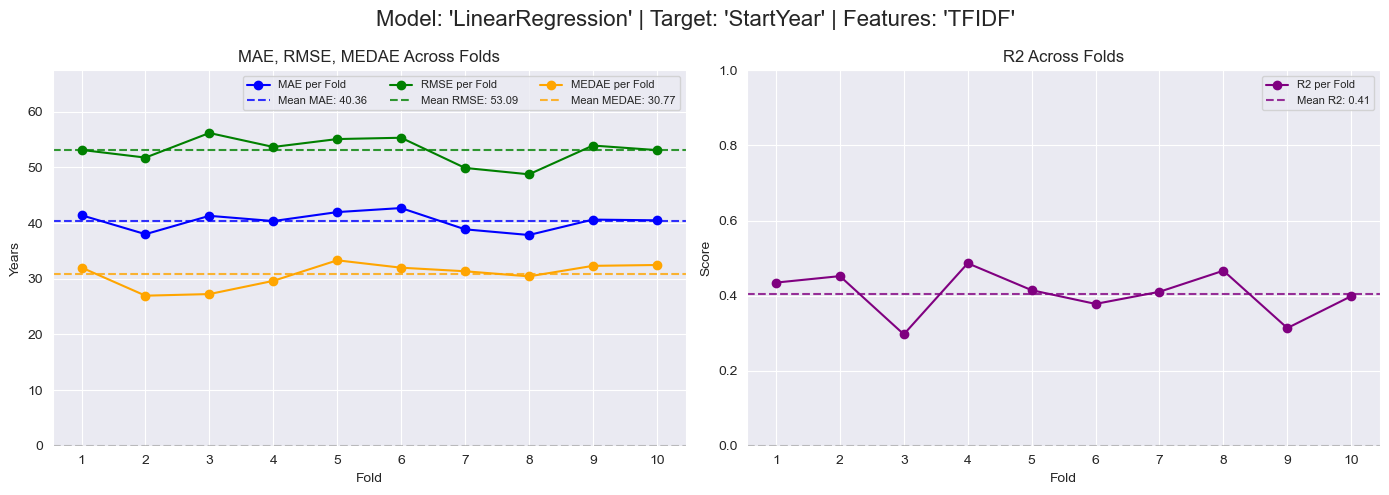

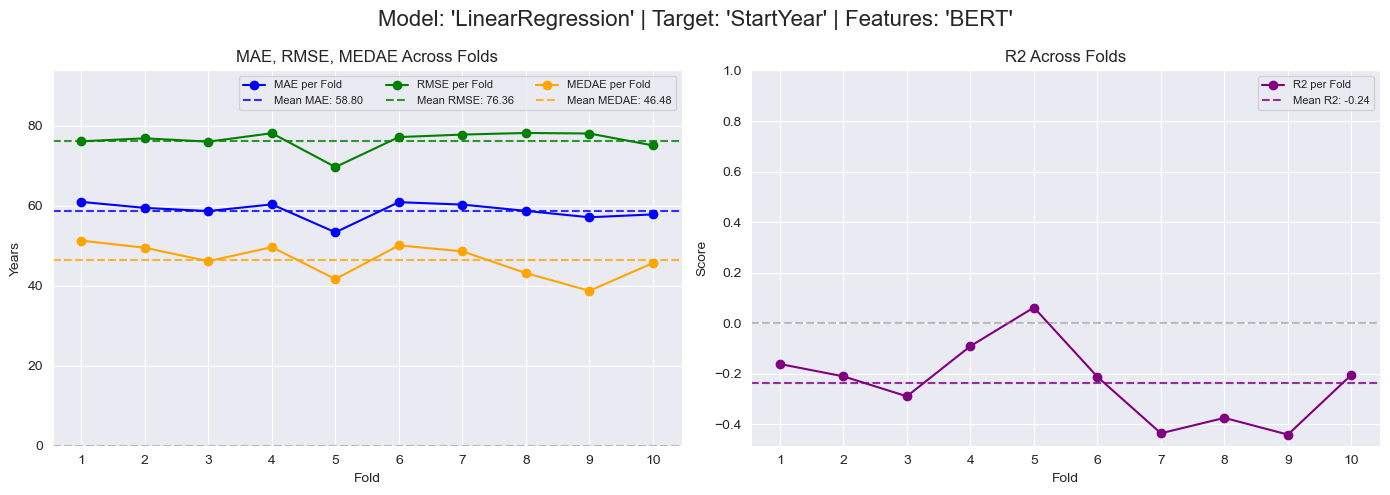

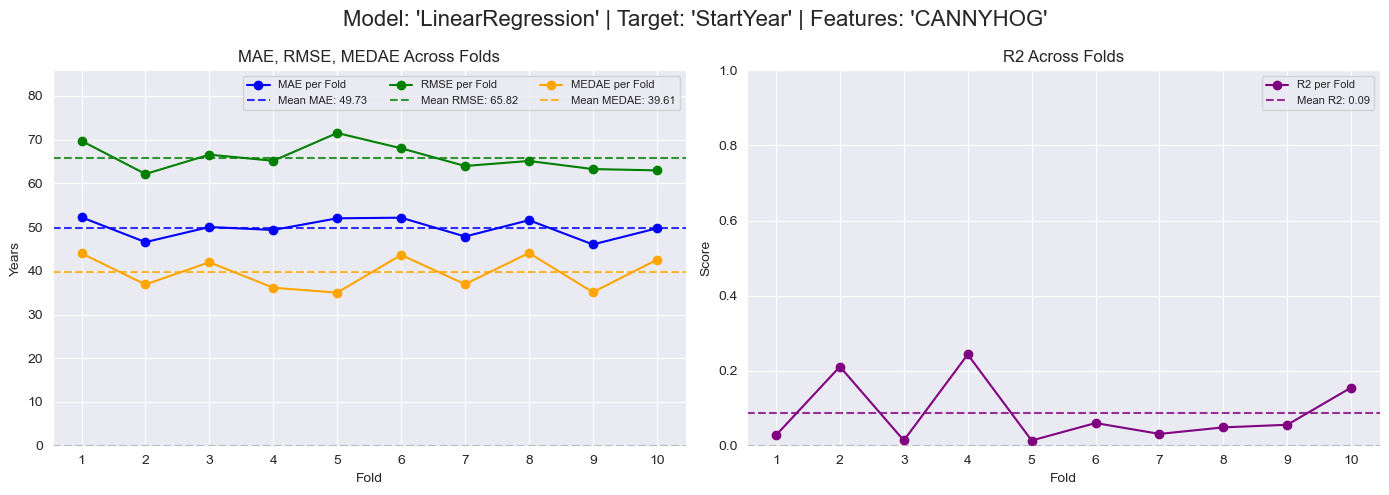

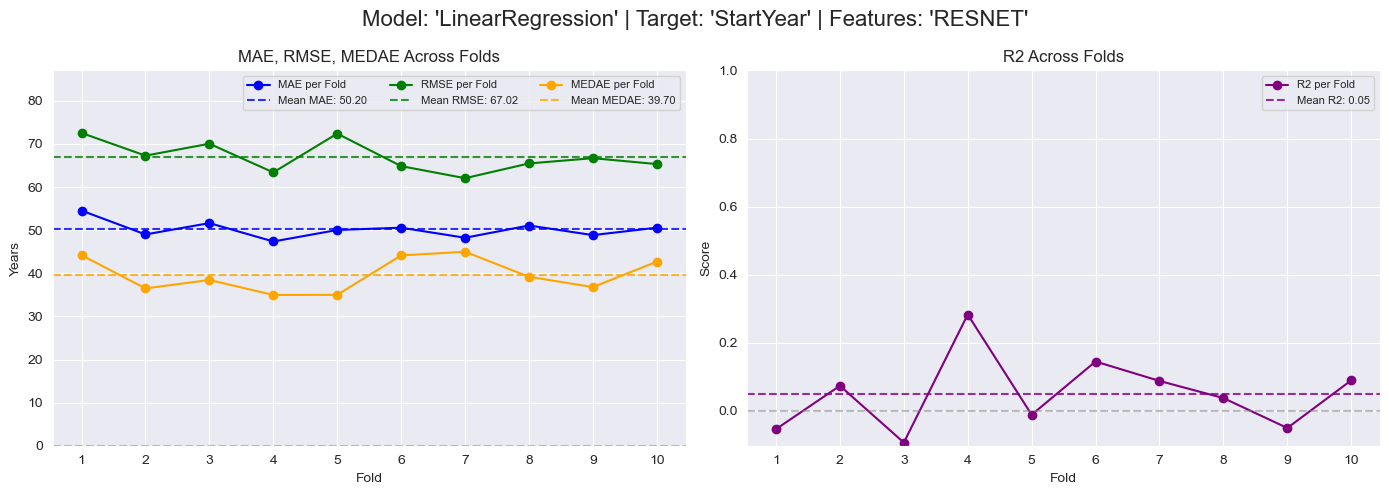

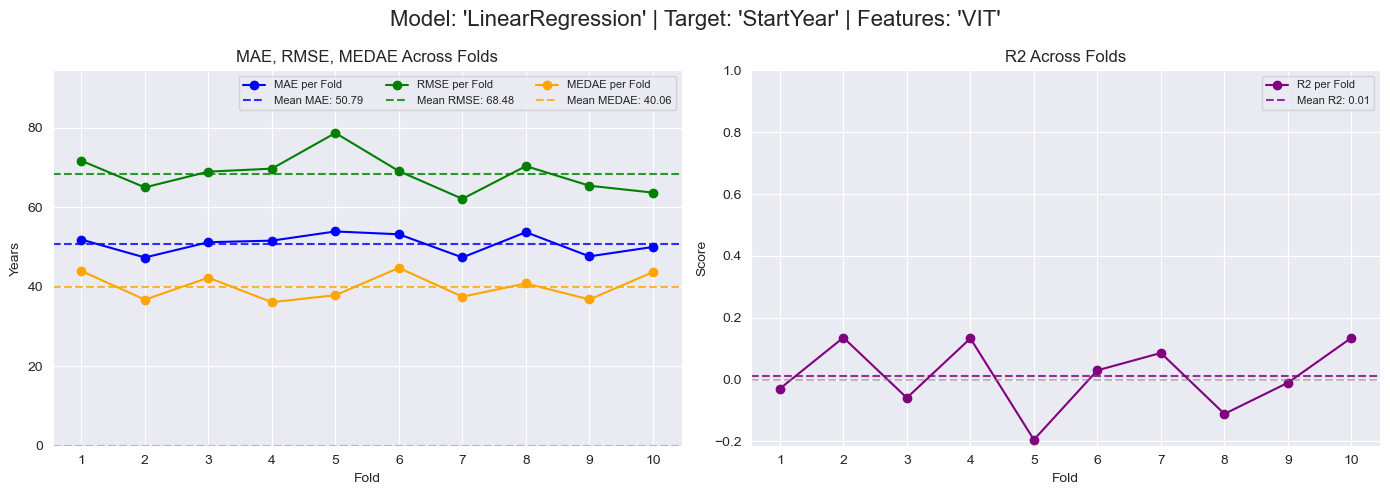

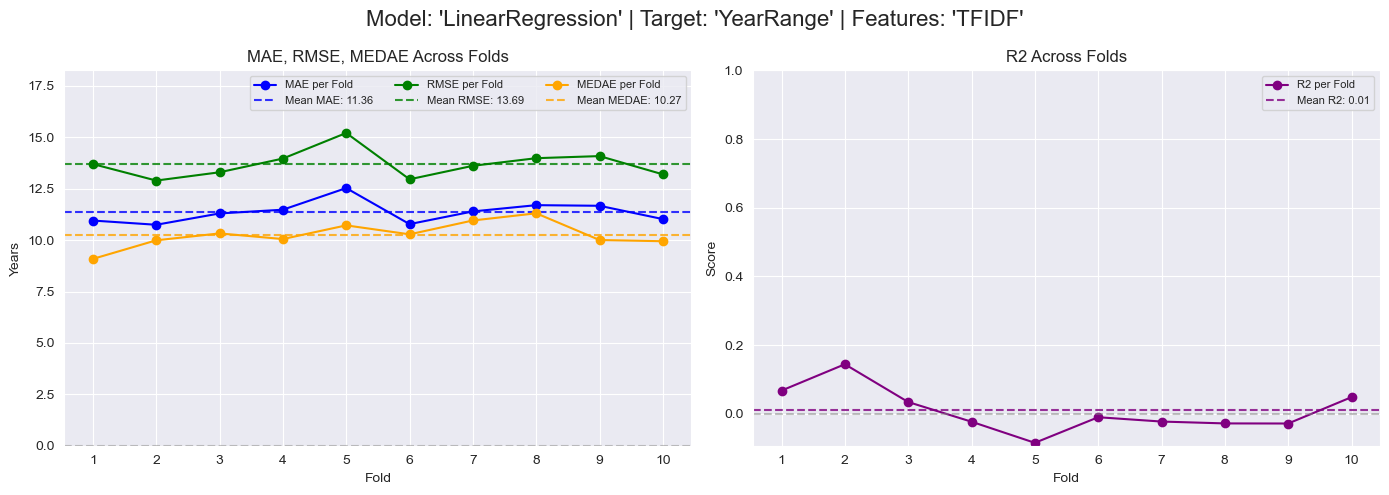

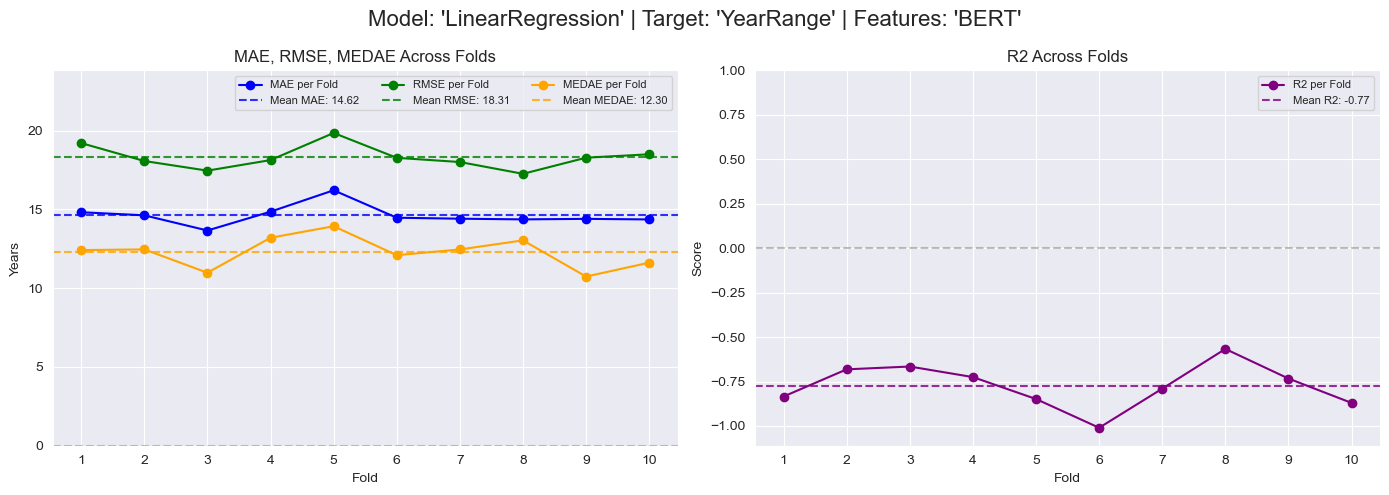

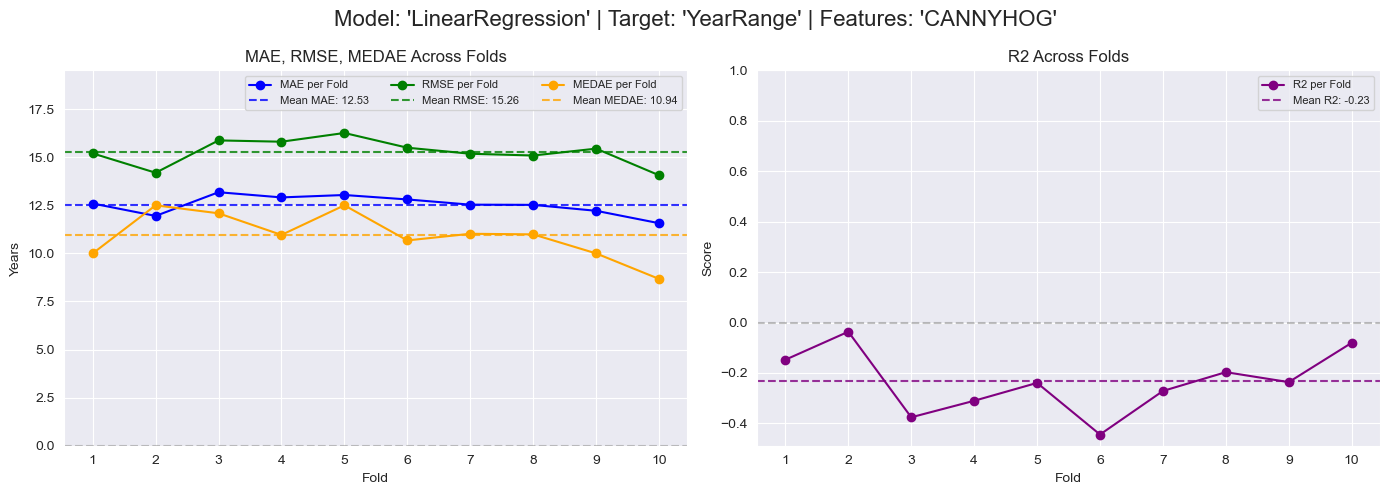

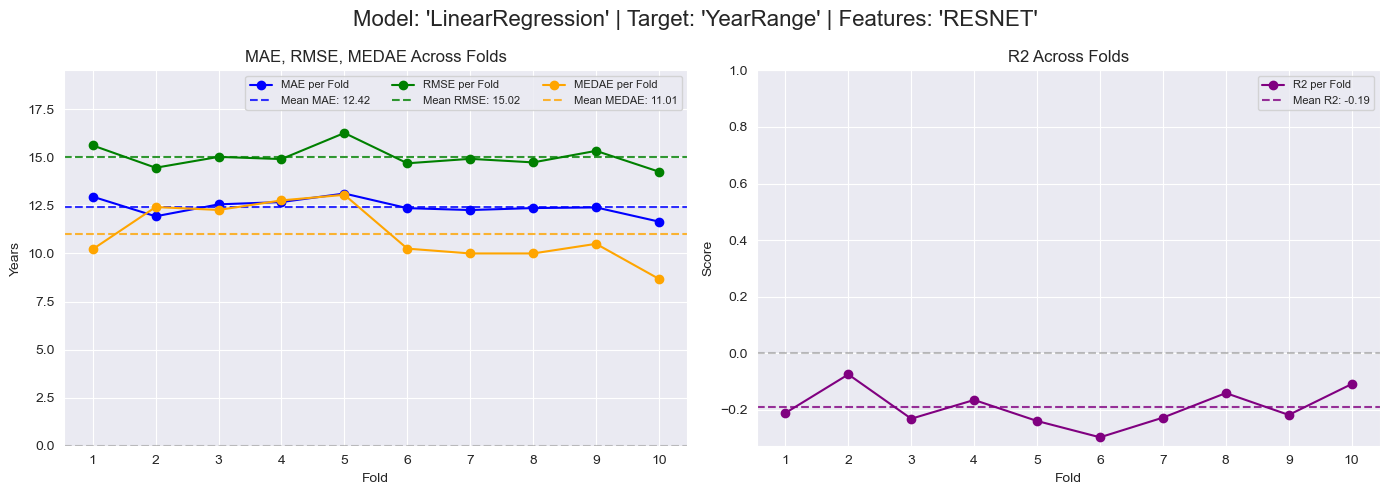

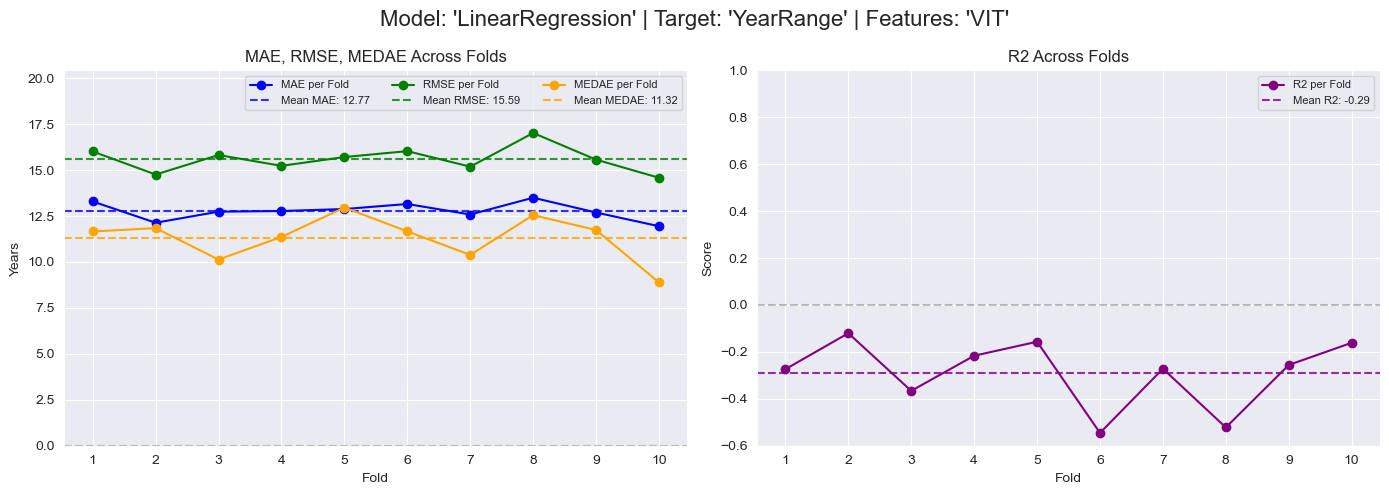

In [98]:
for target, _y in y["train"].items():
    for method, _X in X["train"].items():
        s = cross_validation(model, _X, _y)
        save_cv_scores(s, model_name, target, method)
        plot_cv_scores(s, model_name, target, method)


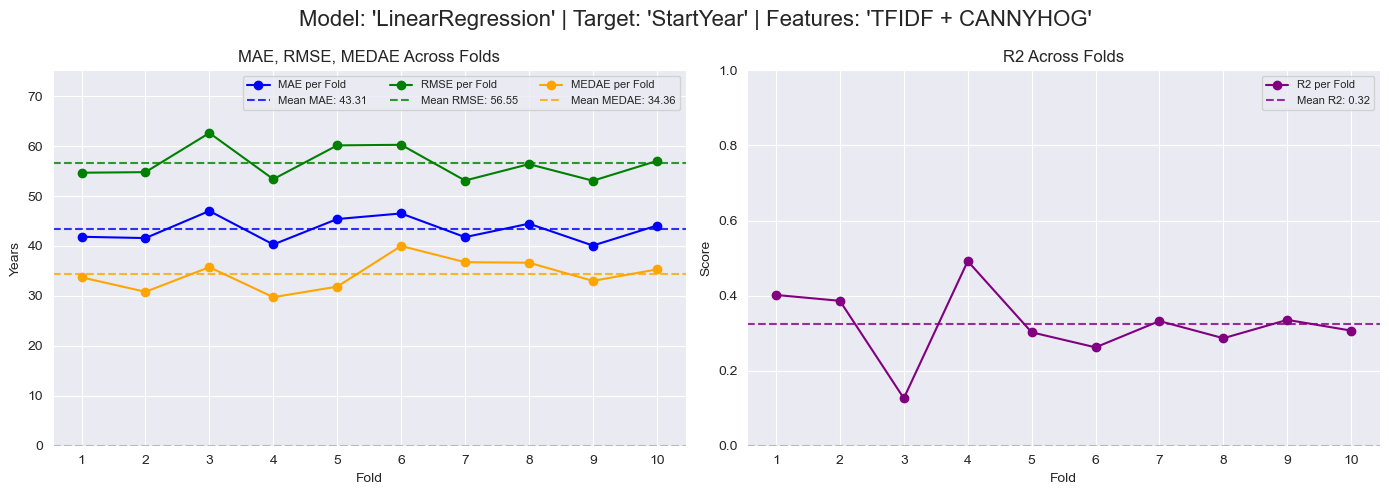

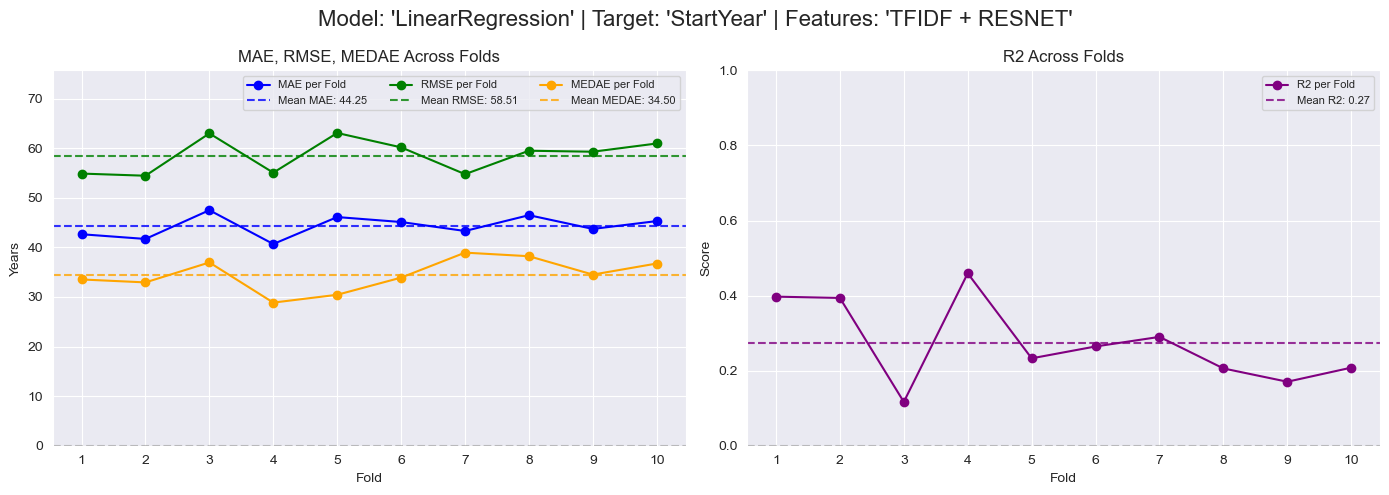

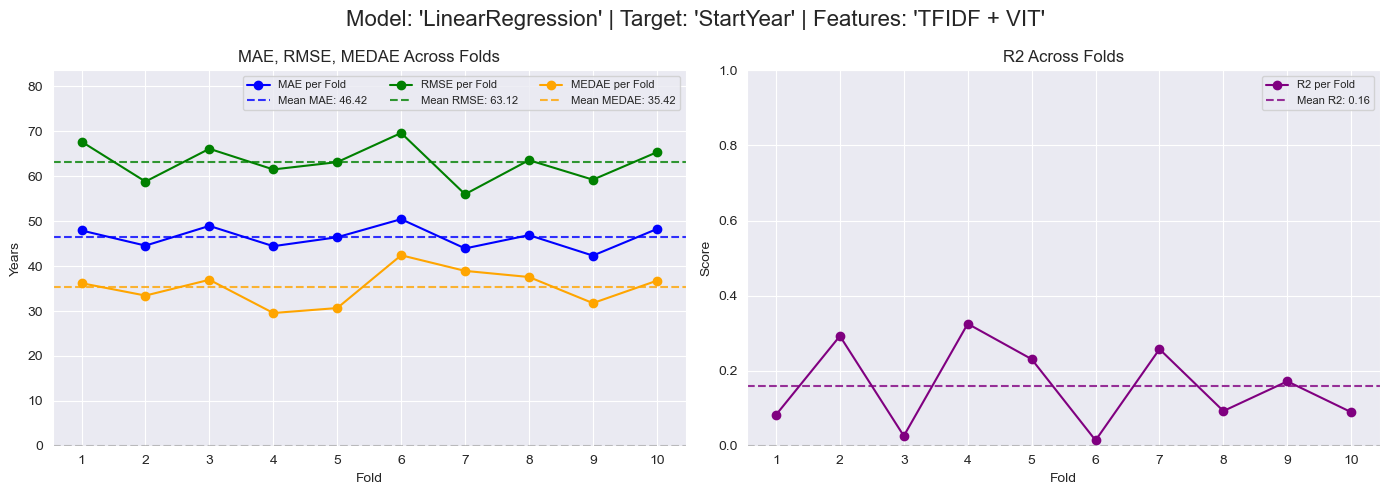

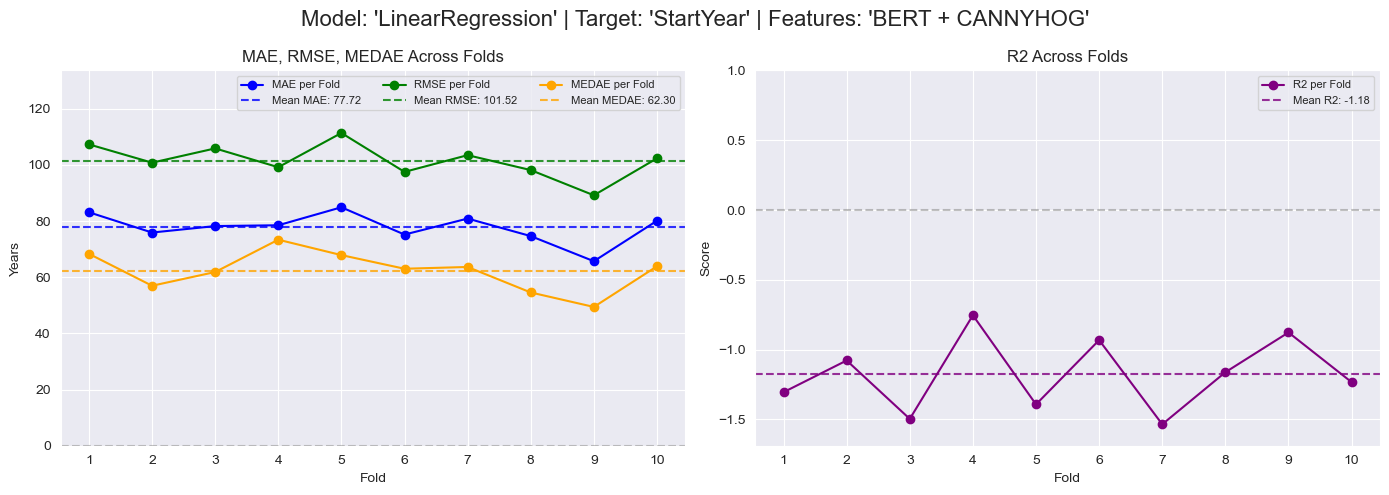

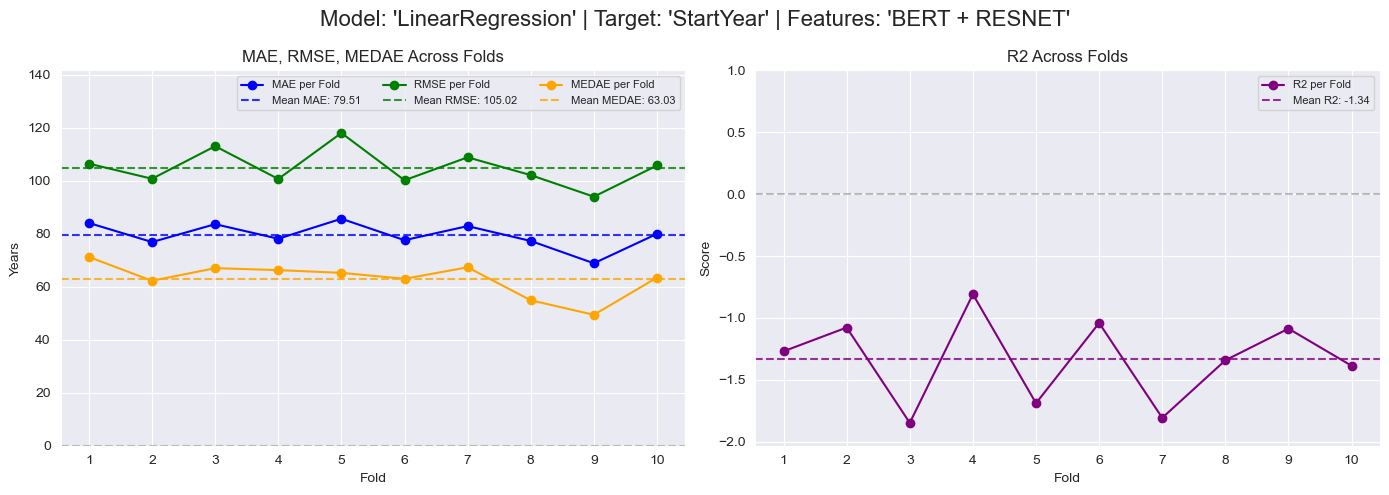

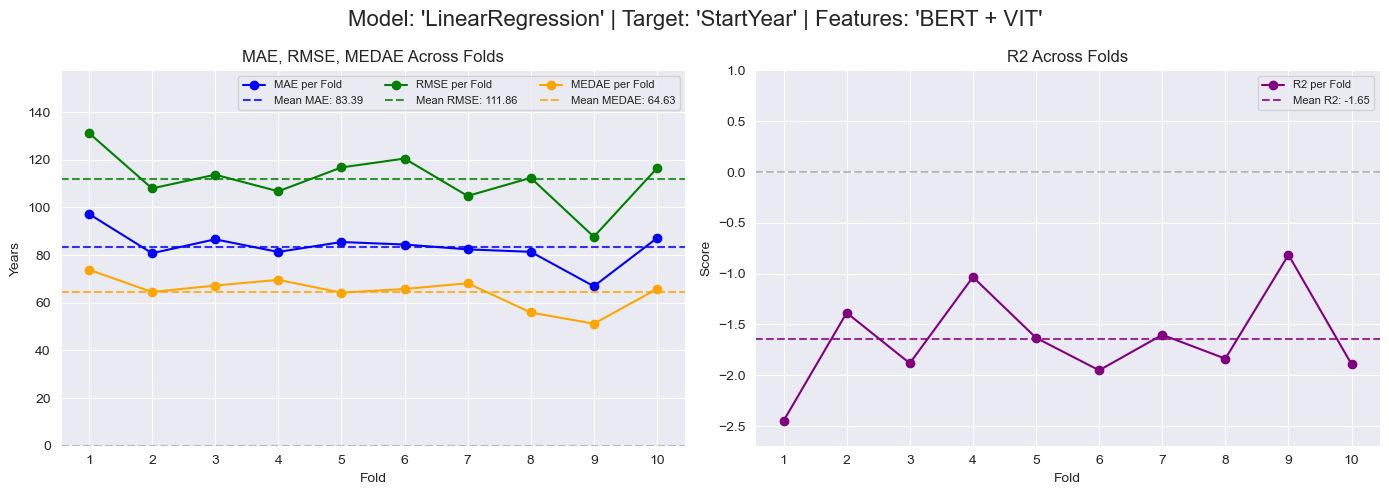

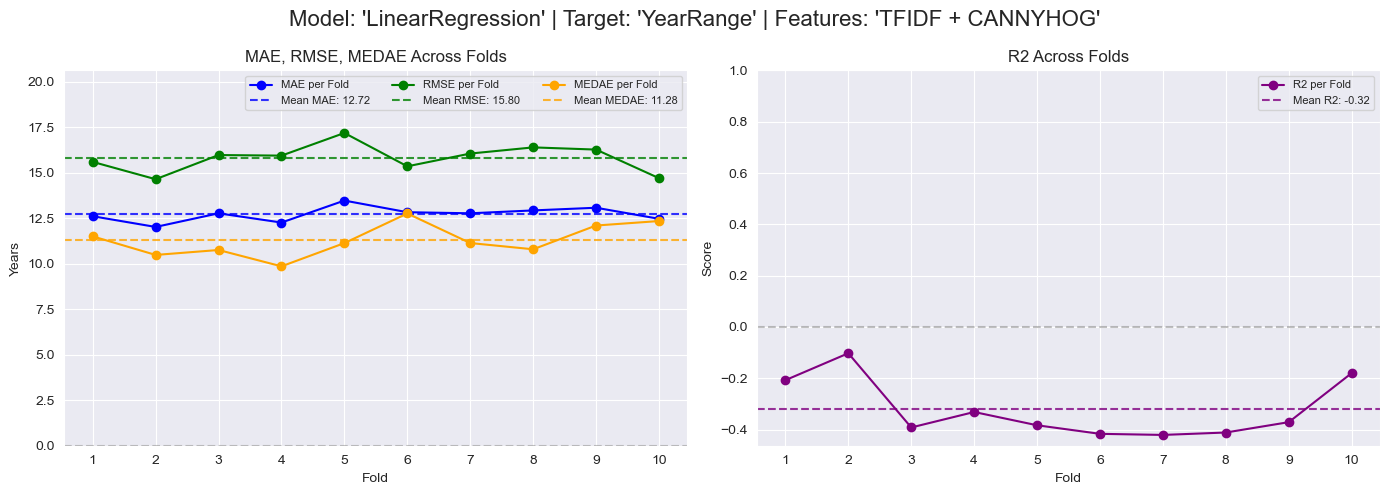

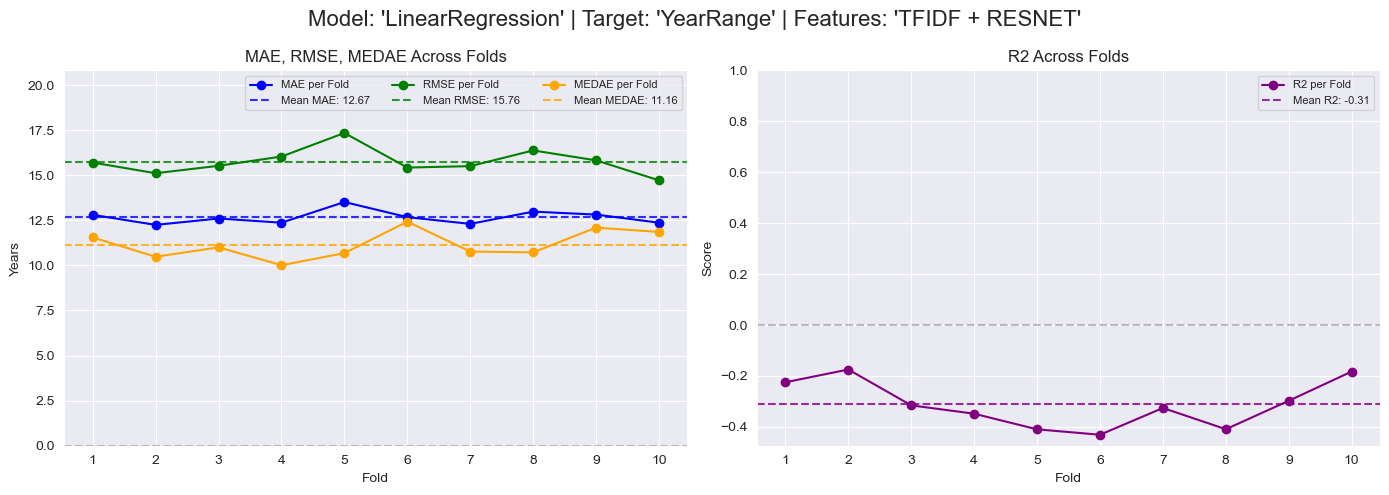

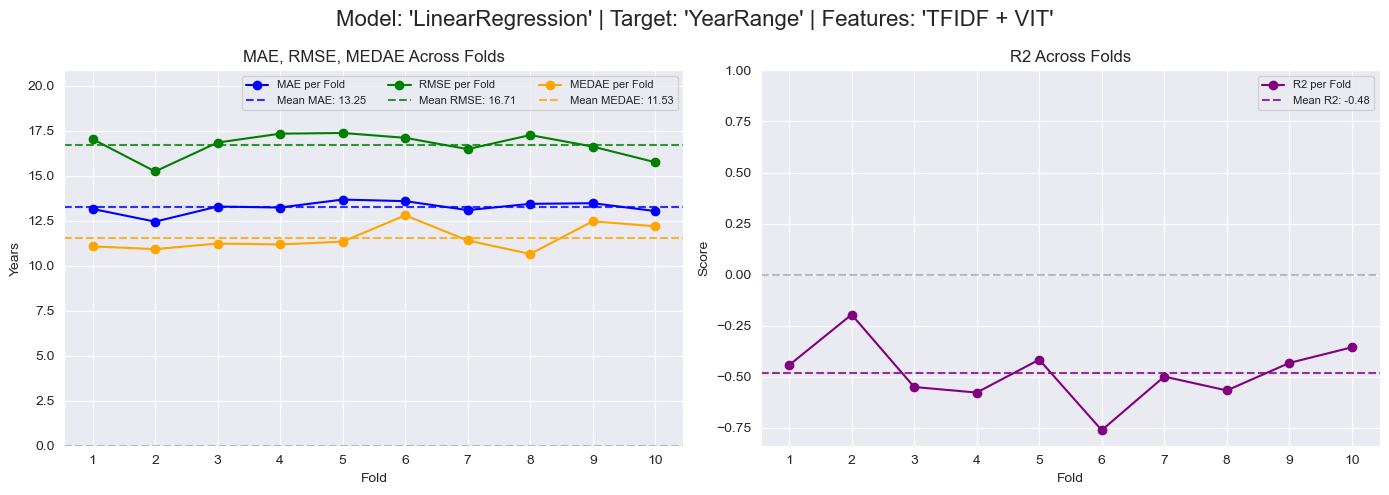

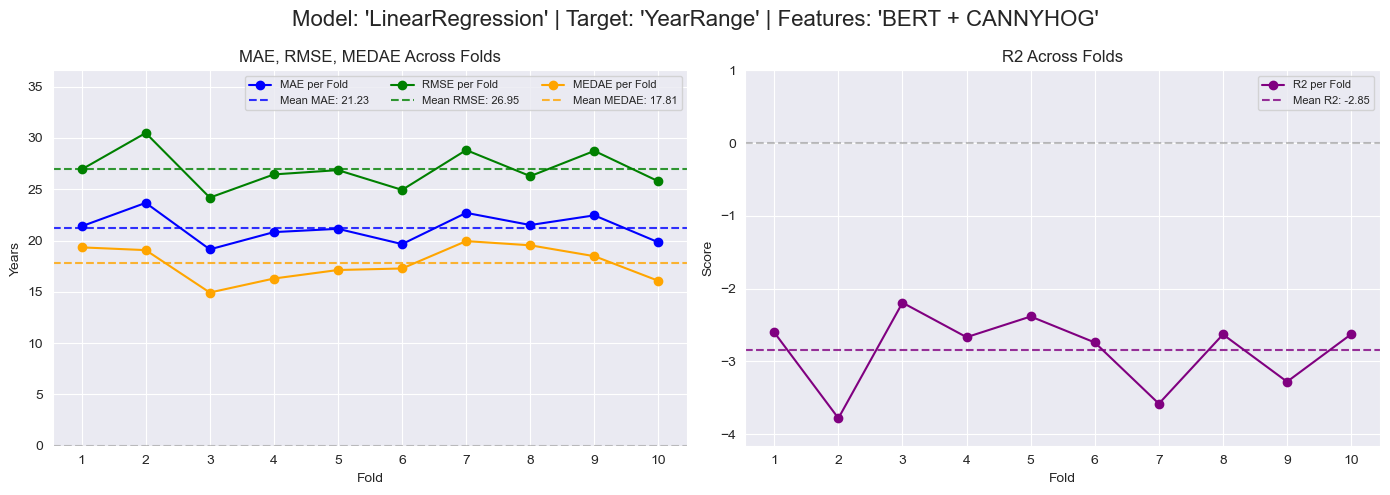

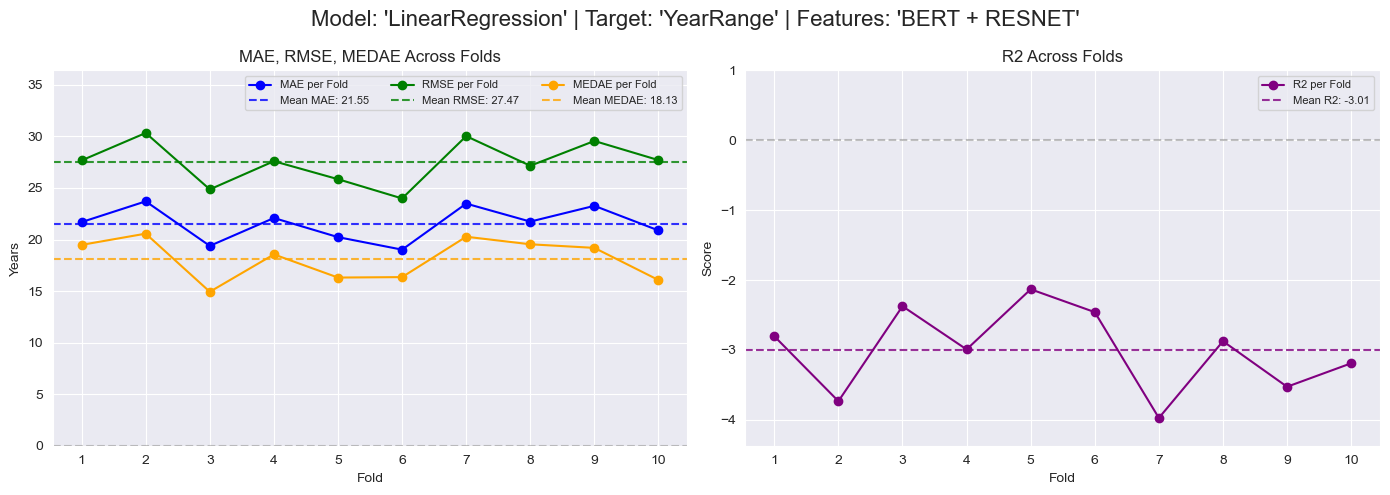

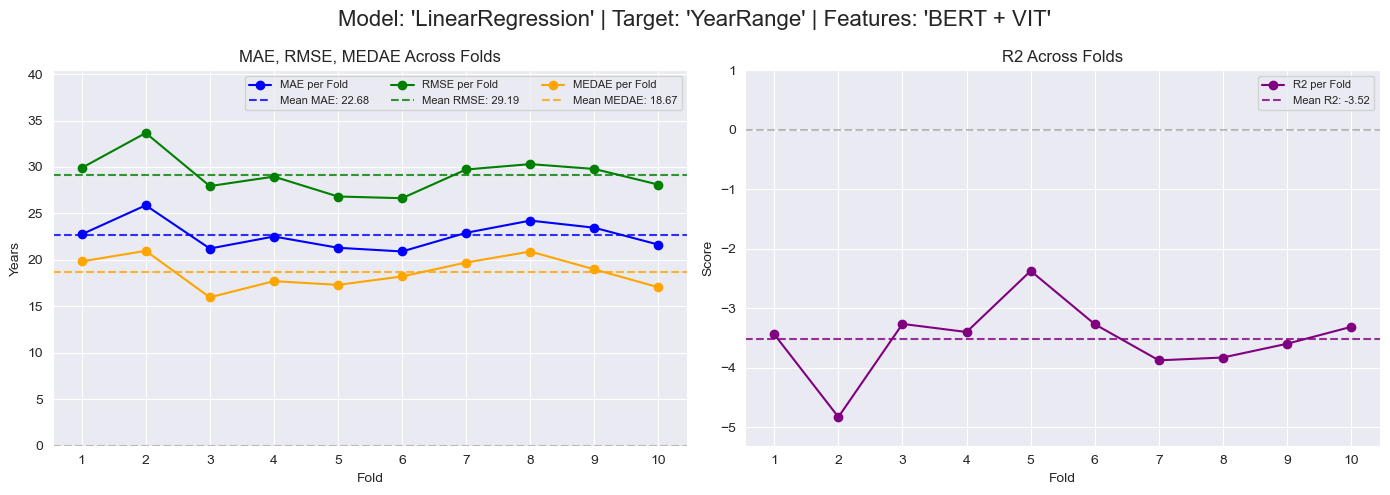

In [99]:
for target, _y in y["train"].items():
    for text_method in d_types_methods["text"]:
        for image_method in d_types_methods["image"]:
            _X = combine_features(X, "train", [text_method, image_method])

            s = cross_validation(model, _X, _y)

            method = f"{text_method} + {image_method}"
            save_cv_scores(s, model_name, target, method)
            plot_cv_scores(s, model_name, target, method)
            print('\n')

In [100]:
cv_scores

model     target          features        mae        rmse  \
0   LinearRegression  StartYear             tfidf  40.362543   53.092781   
1   LinearRegression  StartYear              bert  58.799034   76.356104   
2   LinearRegression  StartYear          cannyhog  49.733316   65.824770   
3   LinearRegression  StartYear            resnet  50.199491   67.020029   
4   LinearRegression  StartYear               vit  50.792881   68.478674   
5   LinearRegression  YearRange             tfidf  11.356655   13.690940   
6   LinearRegression  YearRange              bert  14.623846   18.311084   
7   LinearRegression  YearRange          cannyhog  12.531758   15.261246   
8   LinearRegression  YearRange            resnet  12.424914   15.020199   
9   LinearRegression  YearRange               vit  12.769911   15.593613   
10  LinearRegression  StartYear  tfidf + cannyhog  43.305812   56.546337   
11  LinearRegression  StartYear    tfidf + resnet  44.252345   58.505608   
12  LinearRegression  StartYear       tfidf + vit  46.418965   63.118536   
13  LinearRegression  StartYear   bert + cannyhog  77.723199  101.519194   
14  LinearRegression  StartYear     bert + resnet  79.512854  105.018137   
15  LinearRegression  StartYear        bert + vit  83.389587  111.860536   
16  LinearRegression  YearRange  tfidf + cannyhog  12.716322   15.804901   
17  LinearRegression  YearRange    tfidf + resnet  12.667803   15.756511   
18  LinearRegression  YearRange       tfidf + vit  13.250901   16.714178   
19  LinearRegression  YearRange   bert + cannyhog  21.231766   26.945612   
20  LinearRegression  YearRange     bert + resnet  21.547594   27.473636   
21  LinearRegression  YearRange        bert + vit  22.683622   29.186449   

          r2      medae    maxerror  
0   0.405048  30.769509  182.810945  
1  -0.235014  46.475460  260.437839  
2   0.086146  39.611438  212.483276  
3   0.050839  39.696706  239.307731  
4   0.011582  40.056479  261.848495  
5   0.010022  10.265811   39.586828  
6  -0.772456  12.297664   53.465704  
7  -0.233803  10.940344   45.239645  
8  -0.191898  11.012882   42.689630  
9  -0.289394  11.318988   49.947908  
10  0.323106  34.362985  192.416120  
11  0.273894  34.500787  219.464482  
12  0.158137  35.422276  265.632909  
13 -1.176562  62.297162  337.995030  
14 -1.335451  63.028417  373.840143  
15 -1.648159  64.634711  421.648275  
16 -0.321456  11.282806   44.330050  
17 -0.312058  11.158718   46.029638  
18 -0.480300  11.533786   56.822841  
19 -2.848488  17.806431   87.711310  
20 -3.006316  18.126763   93.028837  
21 -3.518835  18.668816  100.785958

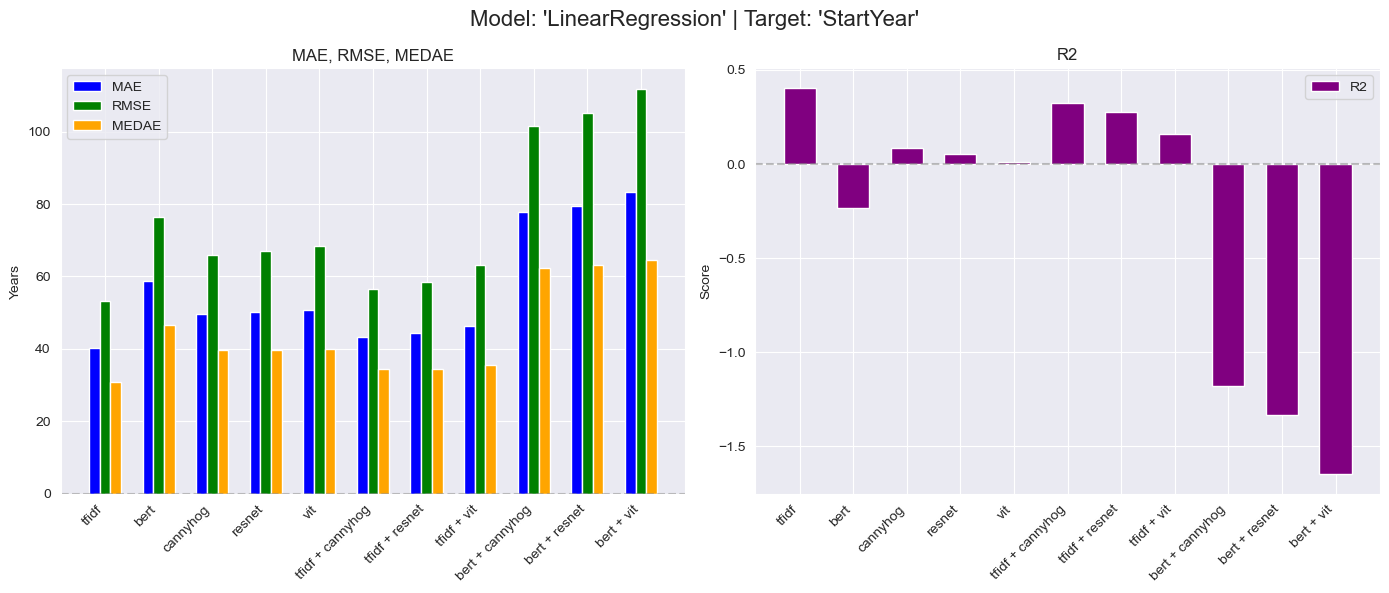

In [101]:
plot_compare_feature_scores(cv_scores, "LinearRegression", "StartYear")

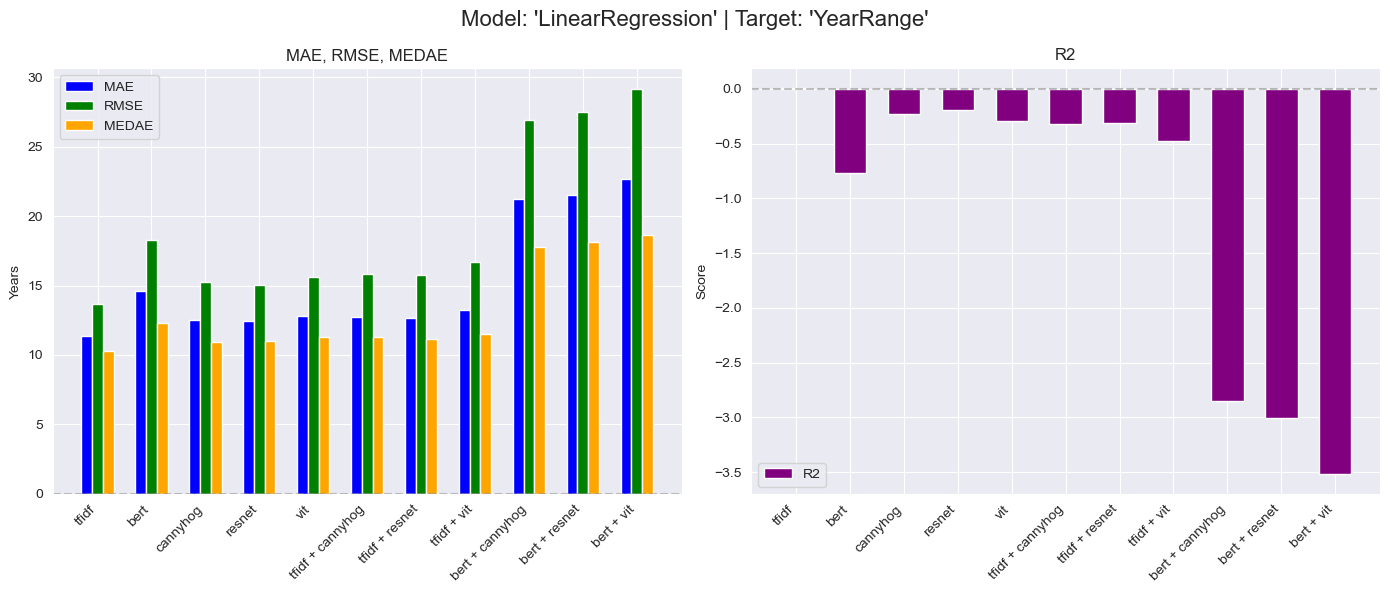

In [102]:
plot_compare_feature_scores(cv_scores, "LinearRegression", "YearRange")

## Ridge Regression

In [104]:
model_name = 'Ridge'
model = Ridge(alpha=1.0, random_state=42)

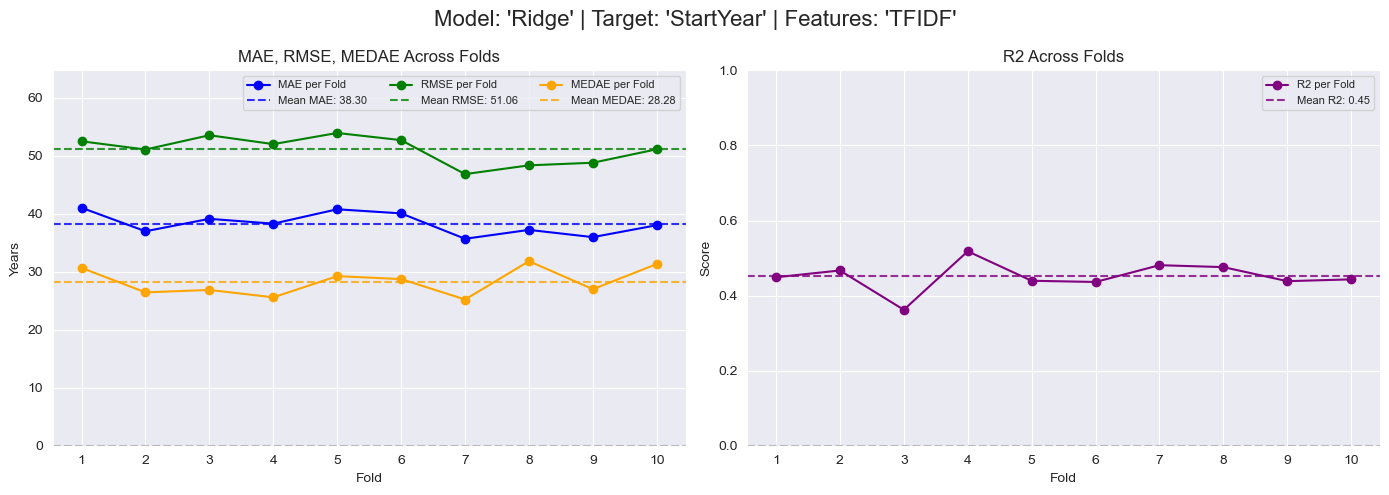

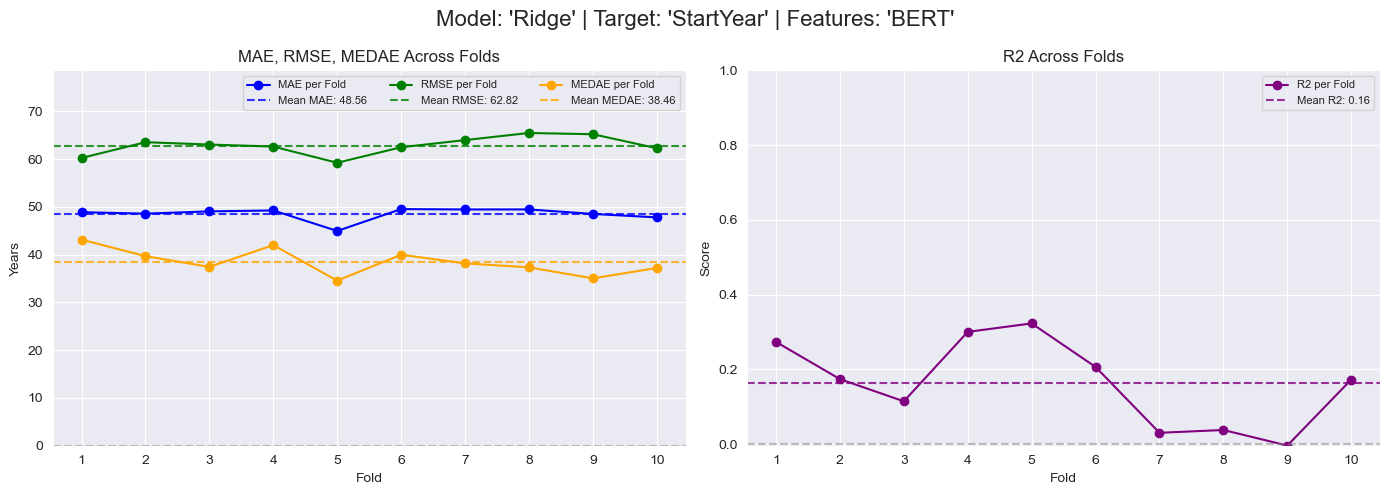

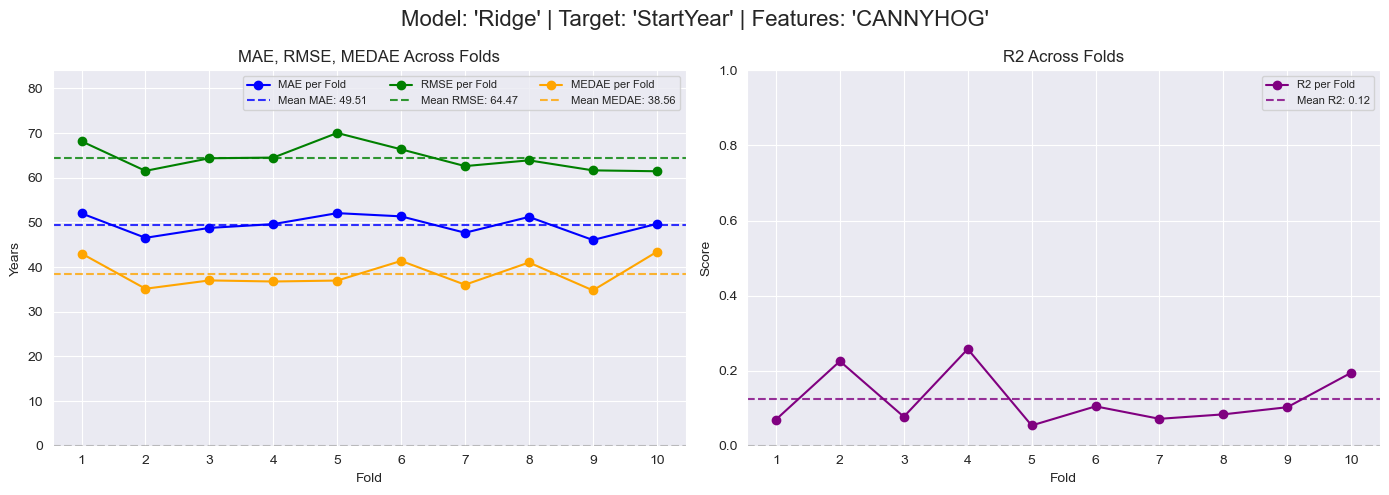

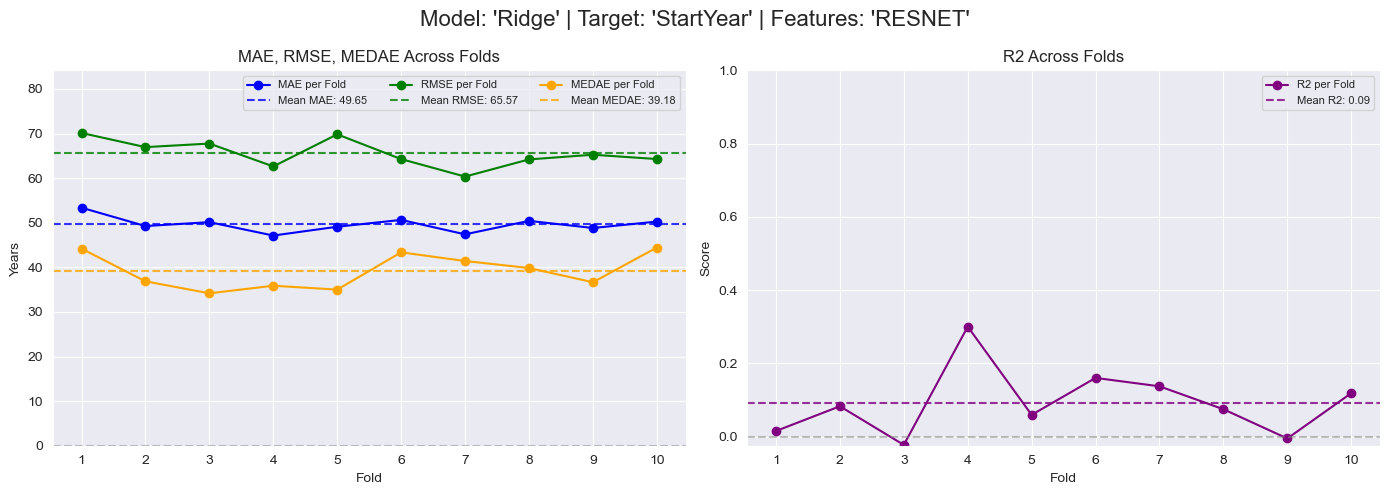

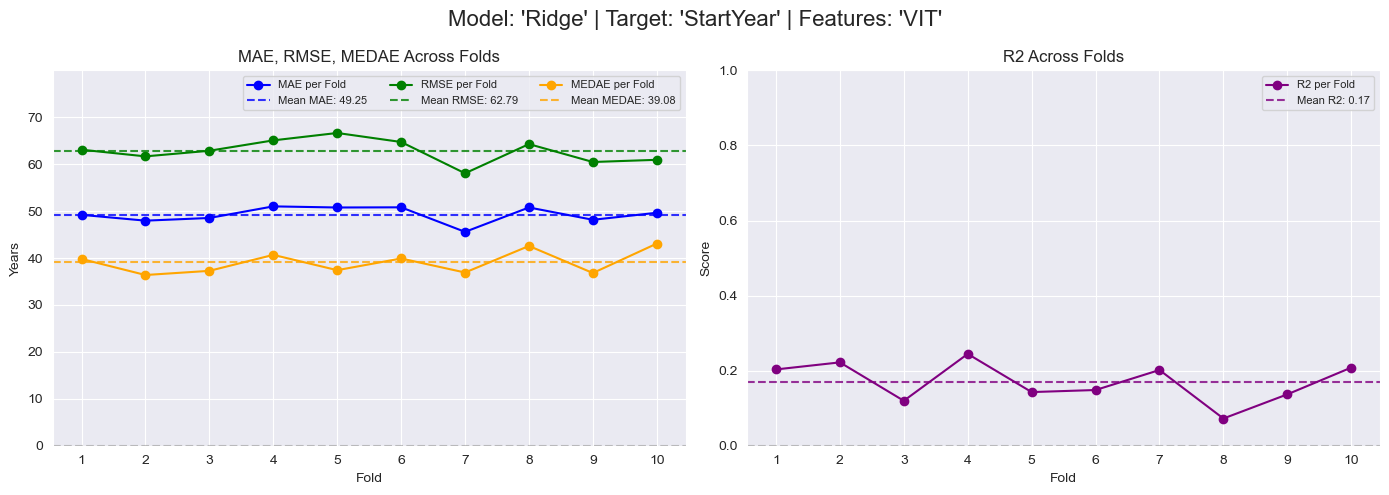

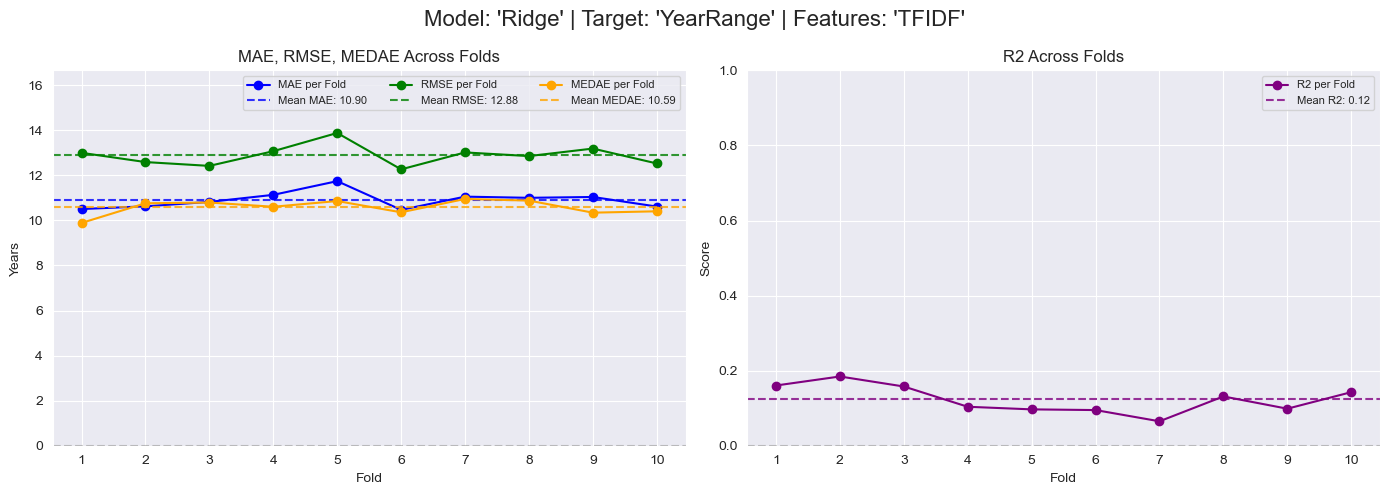

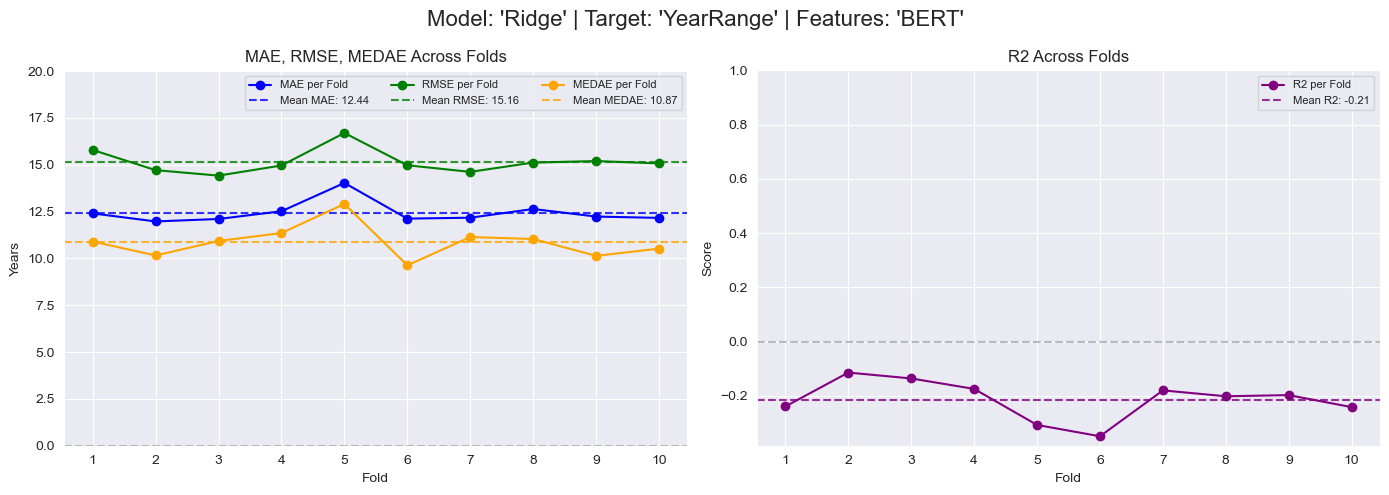

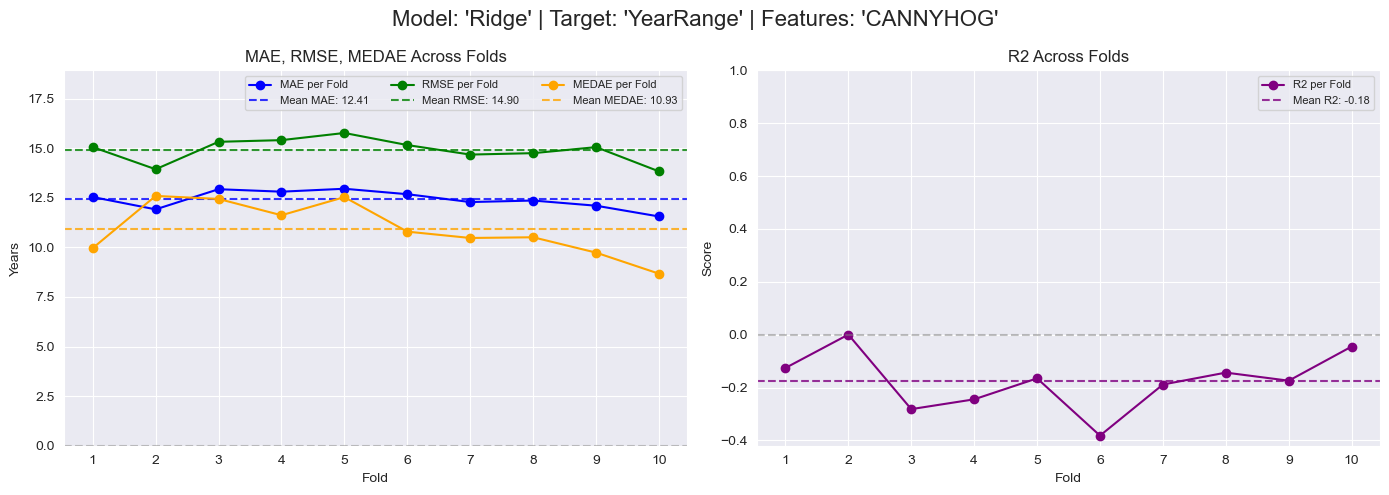

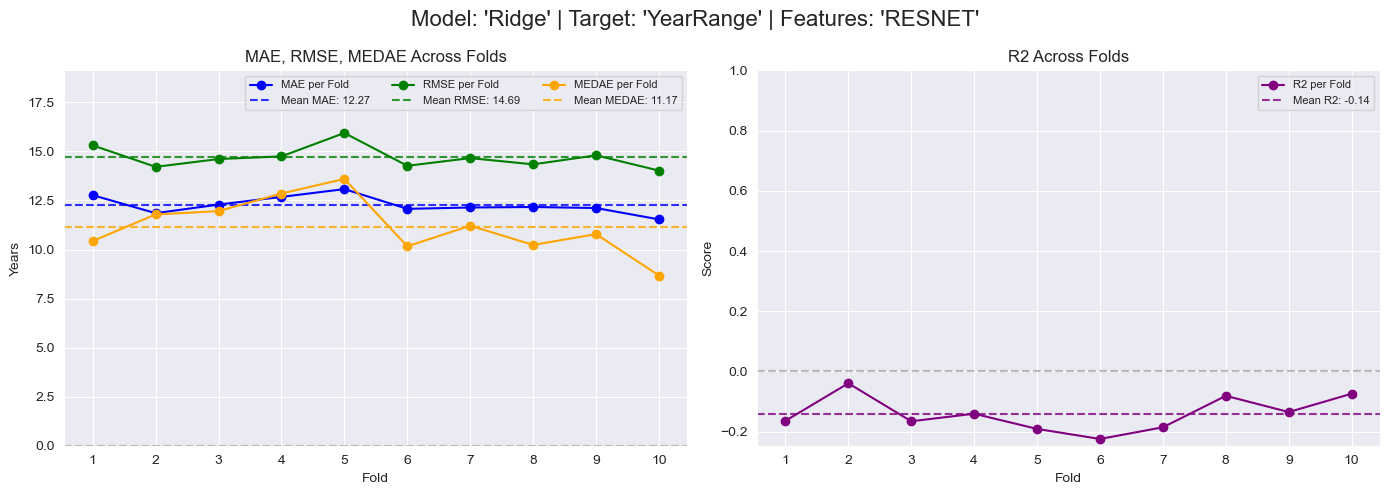

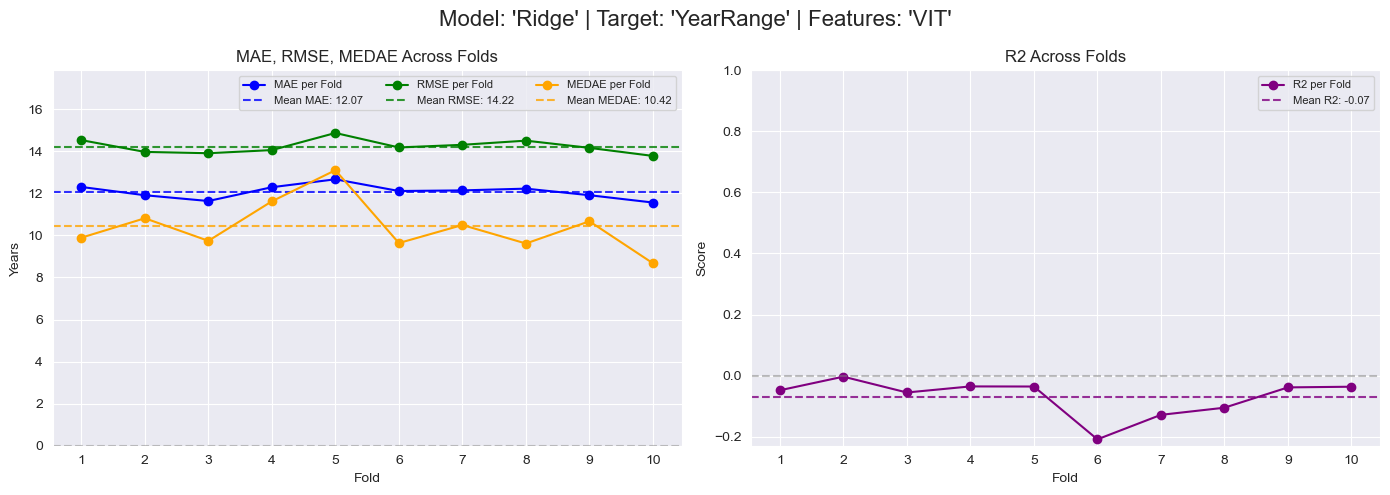

In [110]:
run_cv_all_targets_all_features(model, model_name, X, y)

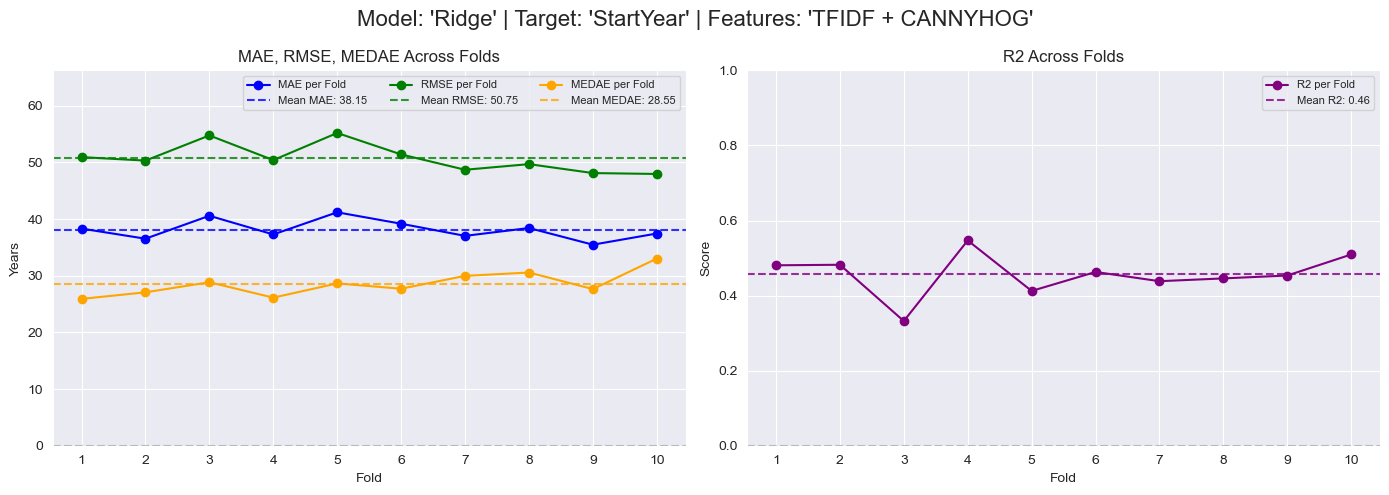

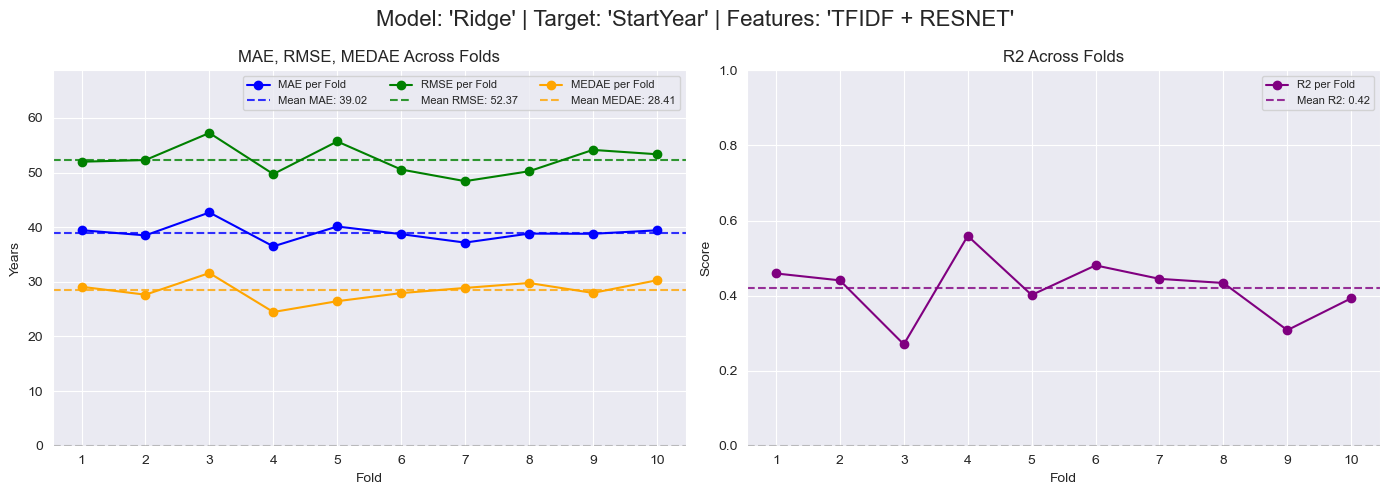

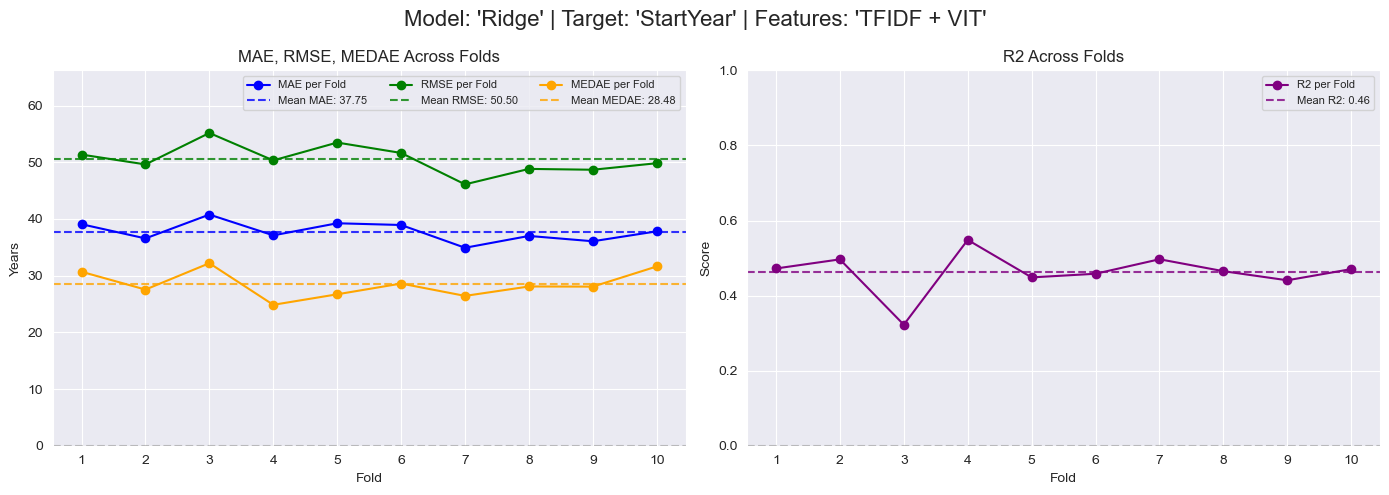

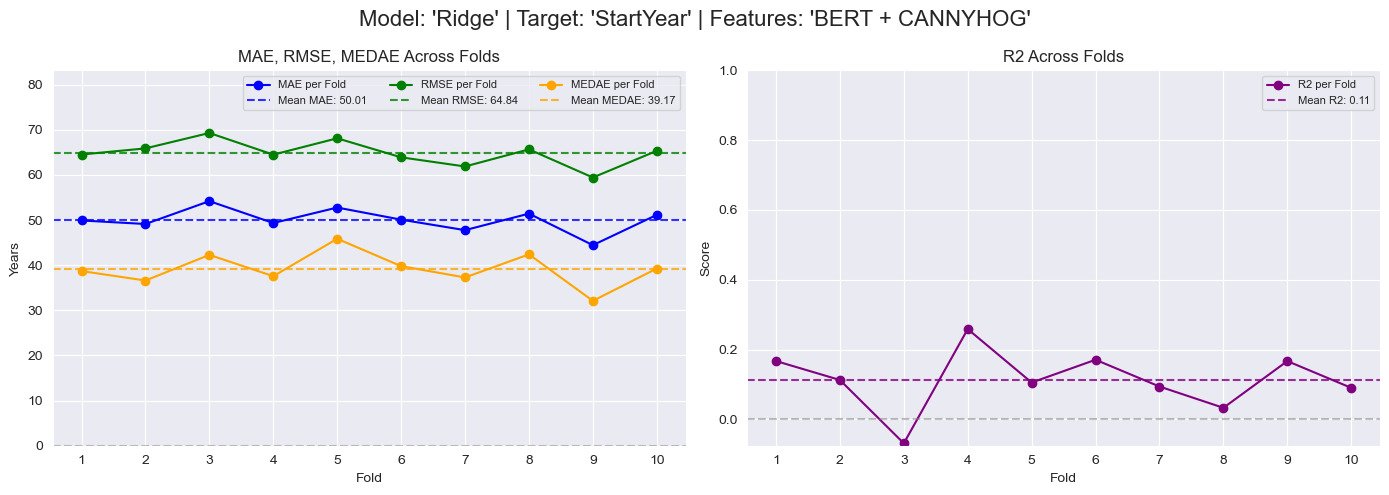

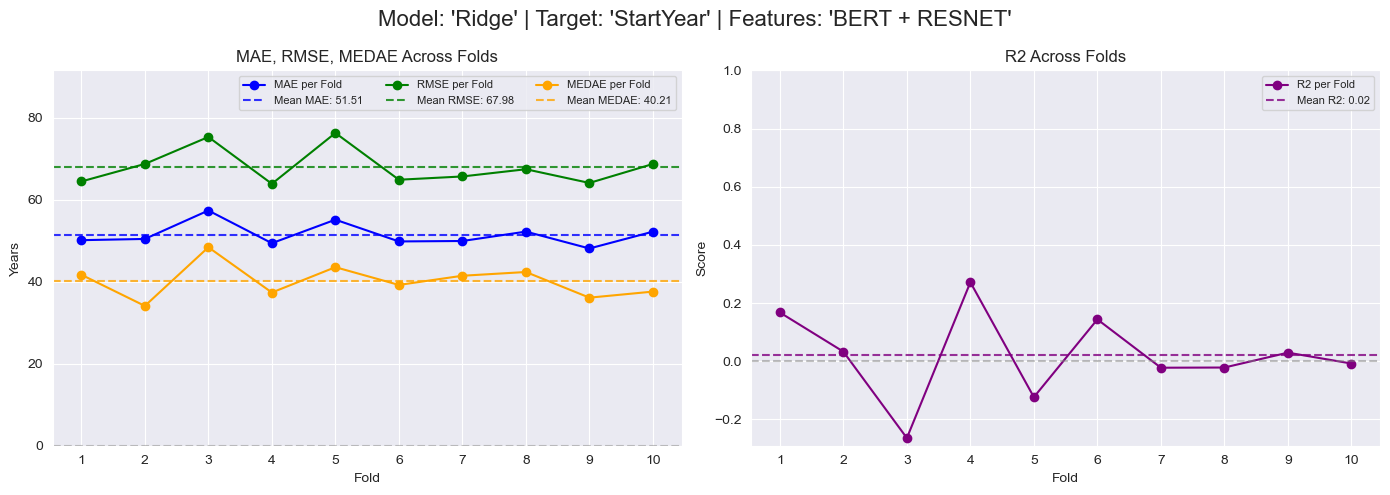

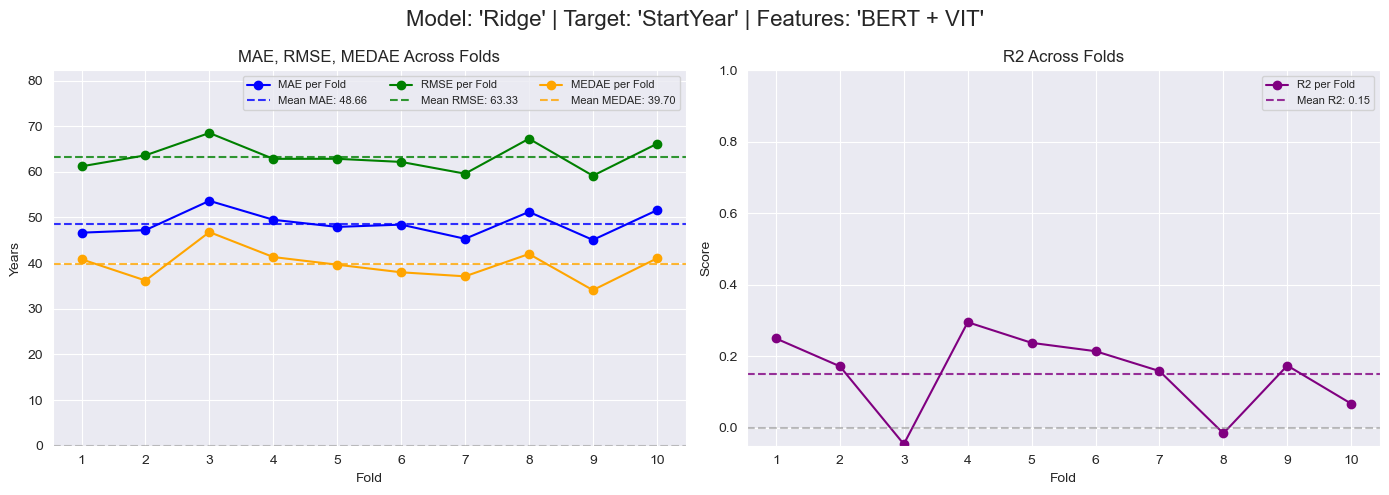

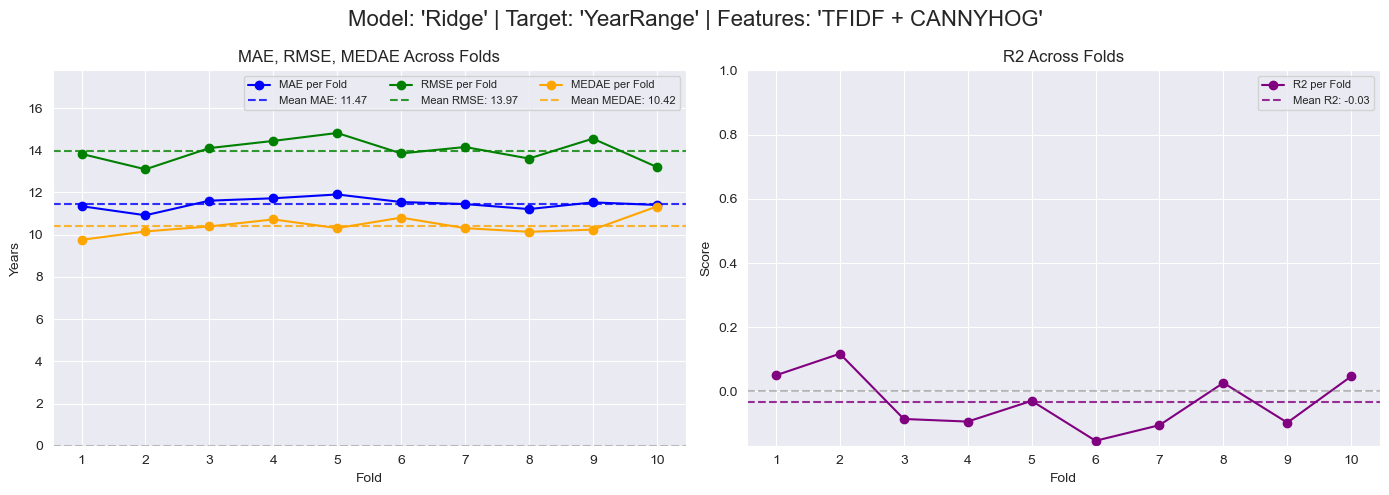

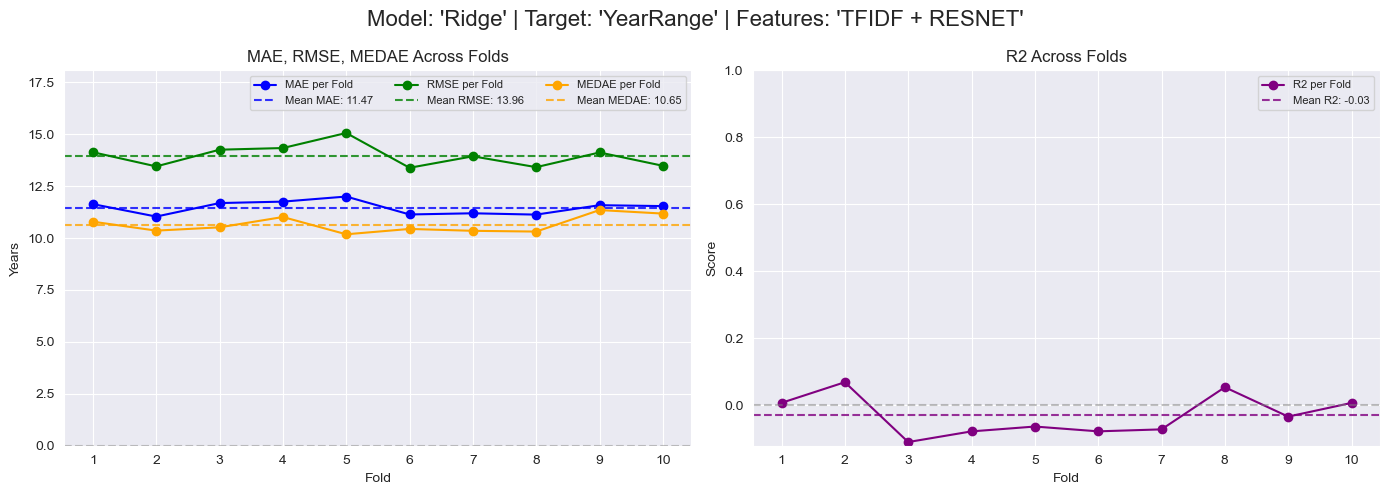

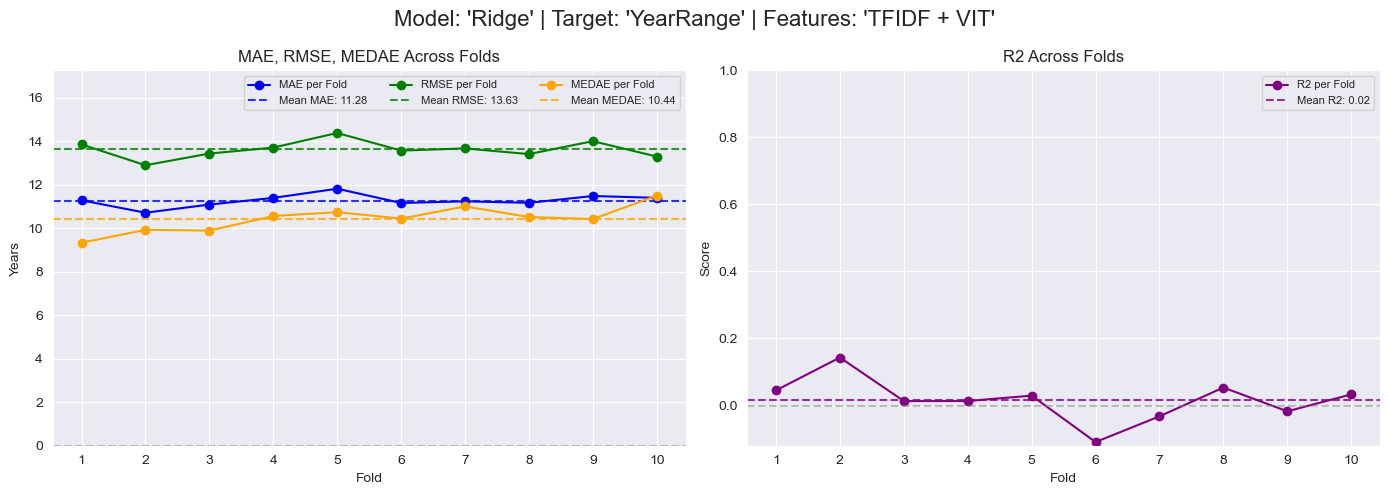

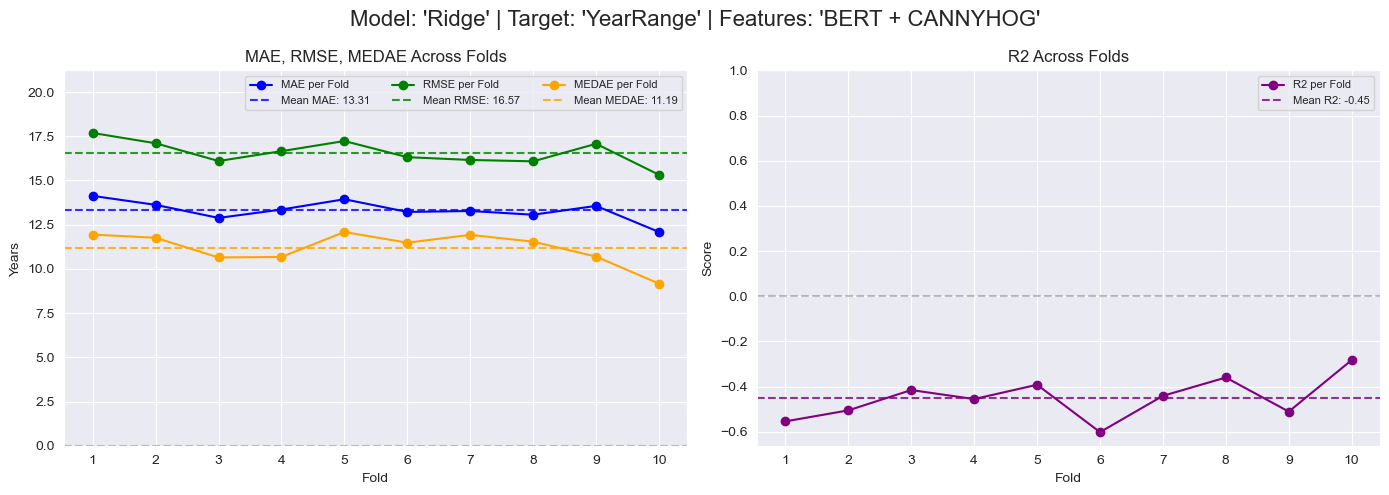

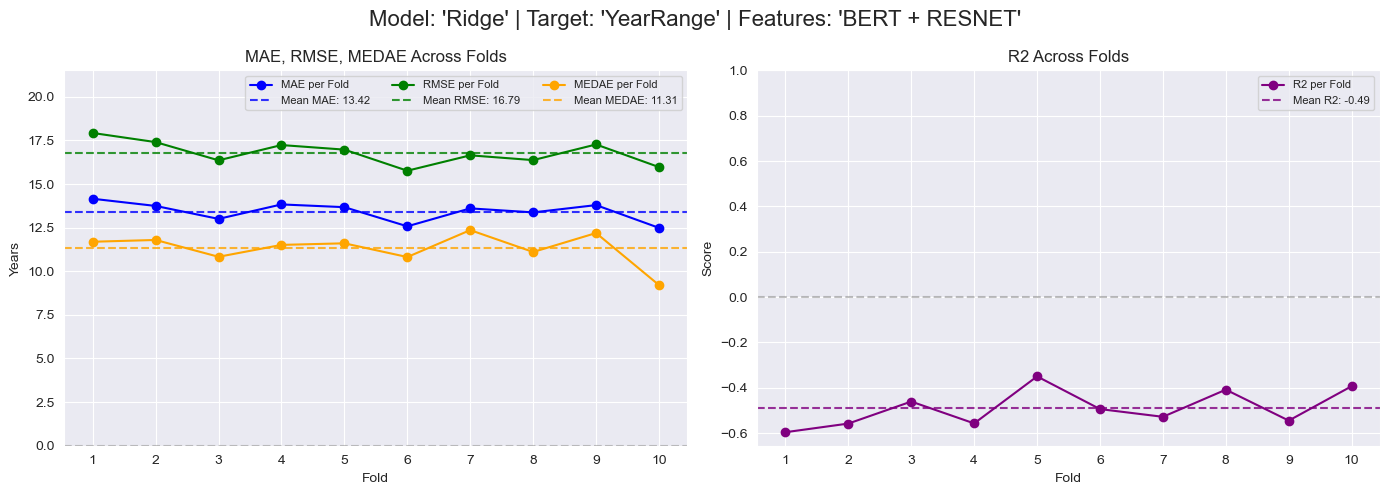

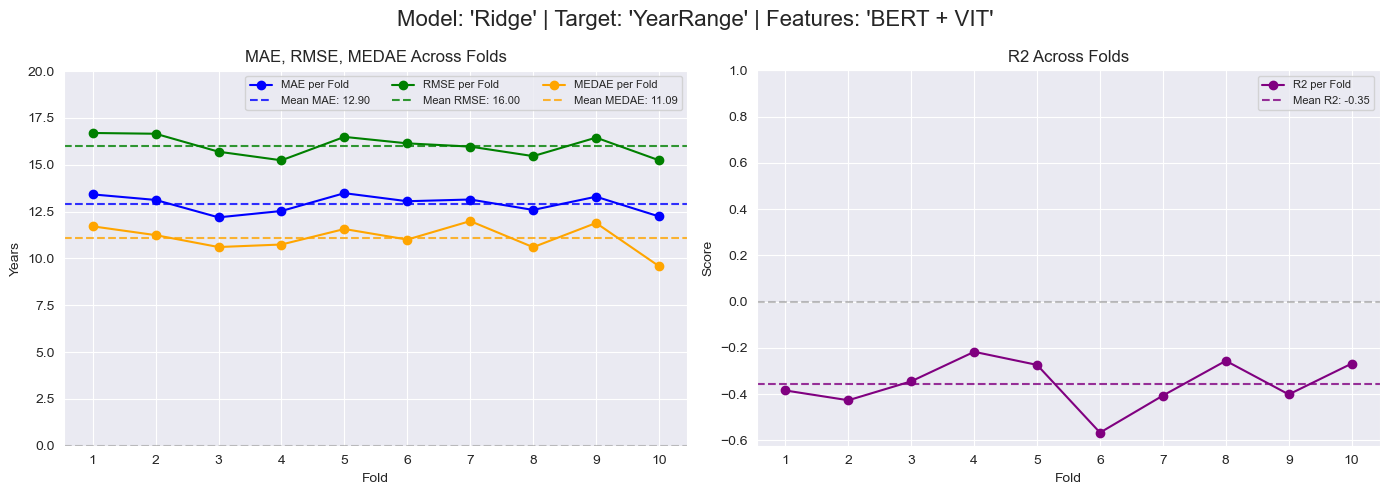

In [111]:
run_cv_all_targets_combined_features(model, model_name, X, y)

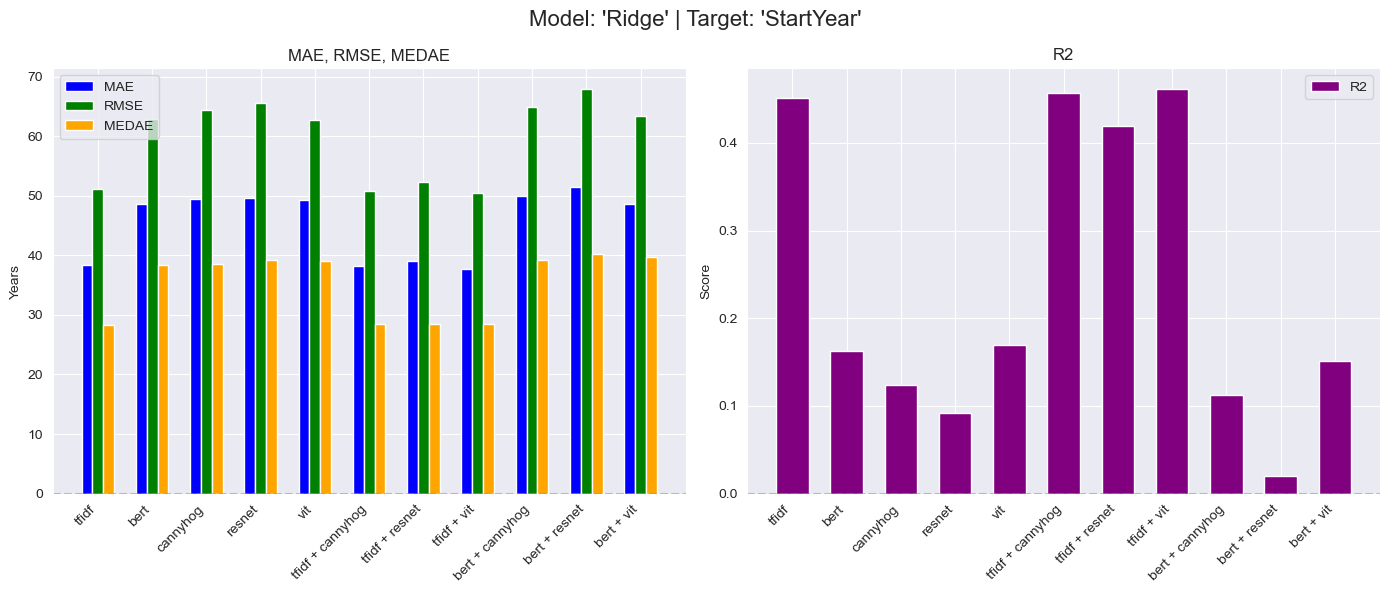

In [112]:
plot_compare_feature_scores(cv_scores, model_name, "StartYear")

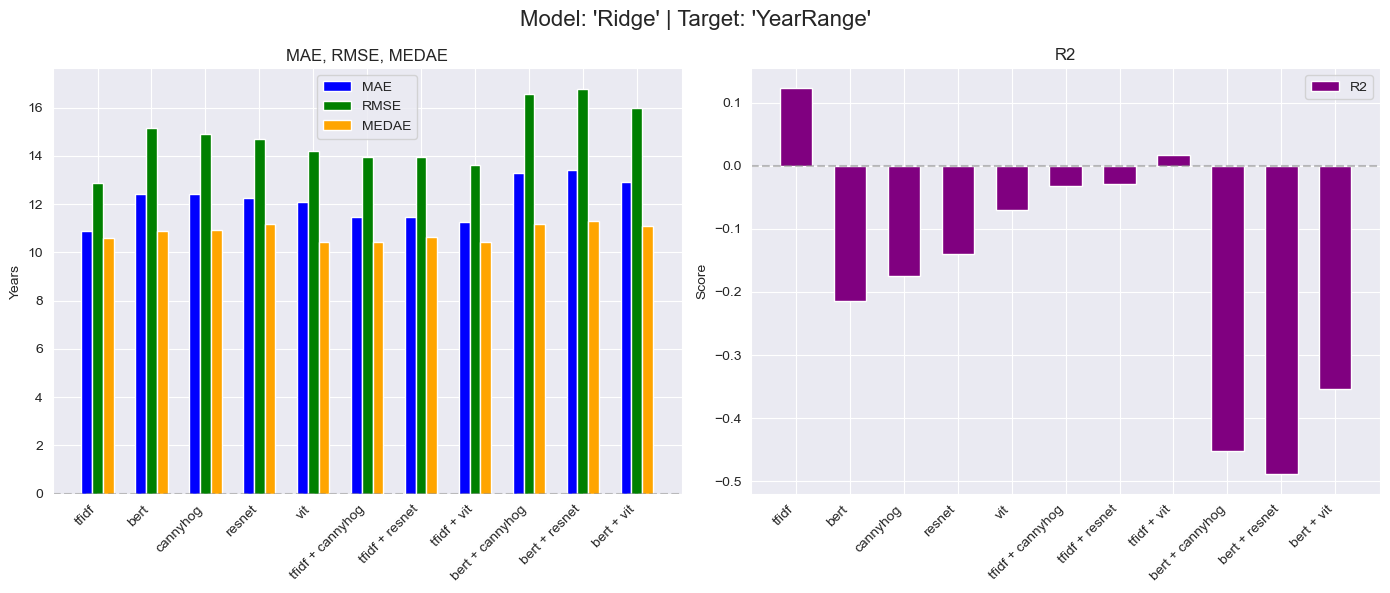

In [113]:
plot_compare_feature_scores(cv_scores, model_name, "YearRange")